# read data

In [1]:
# загрузим библиотеки для чтения данных

import pandas as pd
import numpy as np

# импортируем библиотеки для визуализаци данных

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# option to expand max number of dataframe in "out"
pd.set_option('display.max_columns', 35)

In [3]:
!ls

HW_test_additional_data.csv
HW_test_main_data.csv
HW_train_additional_data.csv
HW_train_main_data.csv
mod_1_hw_1_01_brief_EDA_draft.ipynb
mod_1_hw_1_01_brief_EDA.ipynb
mod_1_hw_1_01.ipynb
mod_1_hw_1_02_modeling_draft_02_GS_CV.ipynb
mod_1_hw_1_02_modeling_draft_03.ipynb
mod_1_hw_1_02_modeling_draft_04.ipynb
mod_1_hw_1_02_modeling_draft_05.ipynb
mod_1_hw_1_02_modeling_draft_06.ipynb
mod_1_hw_1_02_modeling_draft_07.ipynb
mod_1_hw_1_02_modeling_draft_08.ipynb
mod_1_hw_1_02_modeling_draft_09.ipynb
mod_1_hw_1_02_modeling.ipynb
mod_1_hw_1_02_test_preprocess_01.ipynb
part1.csv
part1_digits_4.csv
part1_wrong_ans5.csv
part1_wrong_ans5_too.csv
prediction_1.csv
prediction_2.csv
prediction_3.csv
prediction_4.csv
prediction_5.csv
prediction_6.csv
prediction-Copy1.csv
prediction.csv
Untitled.ipynb
usd_data.csv
xgb-random-grid-search-results-01.csv


In [4]:
# считаем данные в соответствующие датафреймы

train_main_df = pd.read_csv('HW_train_main_data.csv')
train_additional_df = pd.read_csv('HW_train_additional_data.csv')

In [5]:
test_main_df = pd.read_csv('HW_test_main_data.csv')
test_additional_df = pd.read_csv('HW_test_additional_data.csv')

In [6]:
usd_rub_df = pd.read_csv('usd_data.csv')

In [7]:
# добавим дополнительные данные

whole_train_df = train_main_df.merge(train_additional_df, how='left', on='id')
whole_train_df_to_data_prep = whole_train_df

In [8]:
# конвертируем колонку в datetime

whole_train_df['timestamp'] = pd.to_datetime(whole_train_df['timestamp'])

In [9]:
train_main_df.shape

(29000, 13)

In [13]:
train_main_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


In [14]:
train_additional_df.head()

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


In [17]:
train_additional_df.shape

(29000, 19)

Рекомендуемые этапы анализа данных
- EDA
- Подготовка данных
- Моделирование
- Пост анализ

## EDA

In [18]:
# посмотрим на колонки, информацию о пустых значениях и типах данных

train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


In [13]:
# теперь - сводные статистики по числовым переменным

train_main_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08


In [15]:
color = sns.color_palette()
%matplotlib inline

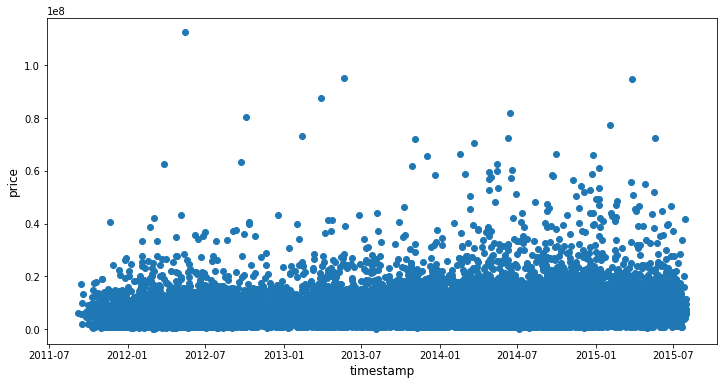

In [16]:
# нарисуем график зависимости цены от даты

plt.figure(figsize=(12, 6))
plt.scatter(train_main_df.timestamp, train_main_df.price)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

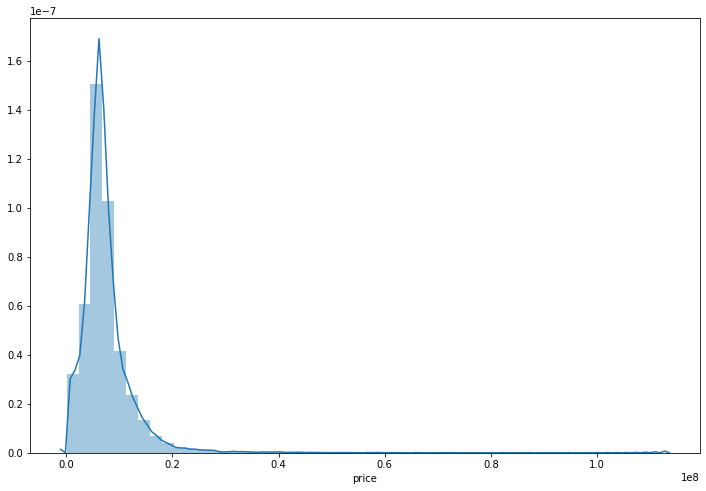

In [17]:
# нарисуем распределение цены

plt.figure(figsize=(12, 8))
sns.distplot(train_main_df.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

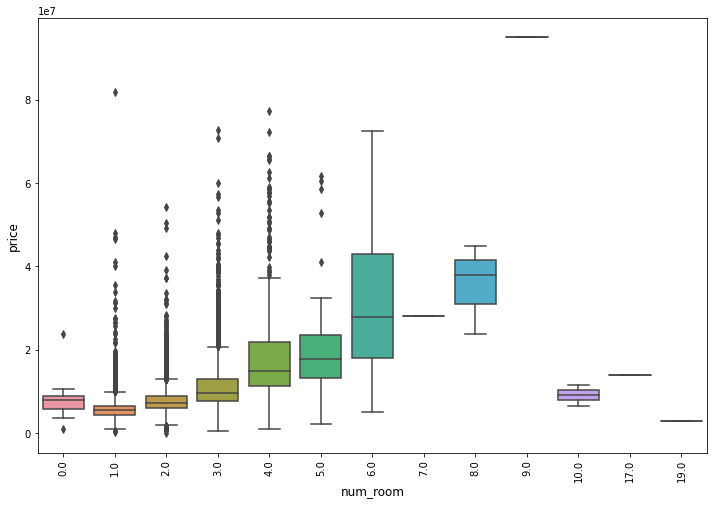

In [69]:
# нарисуем боксплоты для цены по количеству комант в квартире
# медиана цены растет в зависимости от количества комнат
# в данных явно проблемы: квартира с 0 комнат, дешевые квартиры с большим количеством комнат

plt.figure(figsize=(12, 8))
sns.boxplot(x='num_room', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('num_room', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
# зависимость цены за метр от sub_area
whole_train_df['price_per_meter'] = whole_train_df['price'] / whole_train_df['full_sq']
whole_train_df['price_per_meter']


0        161863.333333
1        150981.818182
2         91908.064516
3        153181.818182
4        146621.621622
             ...      
28995     74660.344828
28996    125786.842105
28997    132000.000000
28998    162648.648649
28999     53088.888889
Name: price_per_meter, Length: 29000, dtype: float64

In [20]:
whole_train_df['sub_area'].isnull().sum()

0

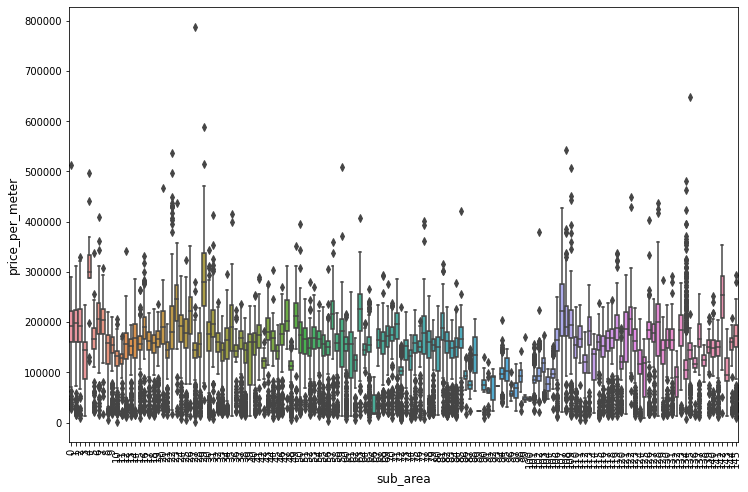

In [181]:
# зависимость цены за метр от sub_area
# добавить новые фичи по sub_area побив медианы price_per_meter на бины (~10) 
# обрабатывать sub_area как категориальный признак

plt.figure(figsize=(12, 8))
sns.boxplot(x='sub_area', y='price_per_meter', data=whole_train_df[(whole_train_df.price_per_meter <= 1000000)])
plt.ylabel('price_per_meter', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


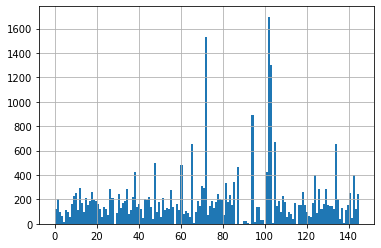

In [35]:
whole_train_df.sub_area.hist(bins=150)

In [29]:
gr_whole_train_df_by_sub_area_price = whole_train_df.groupby(by='sub_area', as_index = False).agg(
    price_per_meter_median = pd.NamedAgg(column = "price_per_meter", aggfunc = np.median)
)
# gr_whole_train_df_by_sub_area_price.columns = ['sub_area', 'price_per_meter_median']
gr_whole_train_df_by_sub_area_price

,sub_area,price_per_meter_median
0,0,192963.414634
1,1,198200.000000
2,2,191612.903226
3,3,143670.588235
4,4,299162.790698
...,...,...
141,141,149852.361111
142,142,253123.076923
143,143,94608.108108
144,144,159978.048780


In [44]:
bins_price_per_meter_median = gr_whole_train_df_by_sub_area_price.price_per_meter_median.quantile(q=np.arange(0.1, 1, 0.1))
bins_price_per_meter_median

0.1     93257.260101
0.2    119982.270270
0.3    143853.671971
0.4    151851.936445
0.5    158870.817476
0.6    164383.606557
0.7    170462.867647
0.8    183339.473684
0.9    197158.474576
Name: price_per_meter_median, dtype: float64

In [46]:
gr_whole_train_df_by_sub_area_price['sub_area_bin'] = np.searchsorted(bins_price_per_meter_median, gr_whole_train_df_by_sub_area_price['price_per_meter_median'].values)
gr_whole_train_df_by_sub_area_price.head()

,sub_area,price_per_meter_median,sub_area_bin
0,0,192963.414634,8
1,1,198200.000000,9
2,2,191612.903226,8
3,3,143670.588235,2
4,4,299162.790698,9


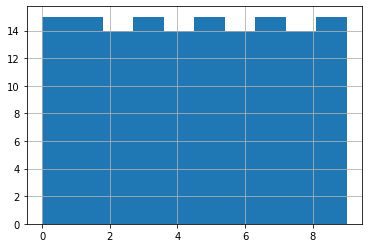

In [47]:
gr_whole_train_df_by_sub_area_price.sub_area_bin.hist()

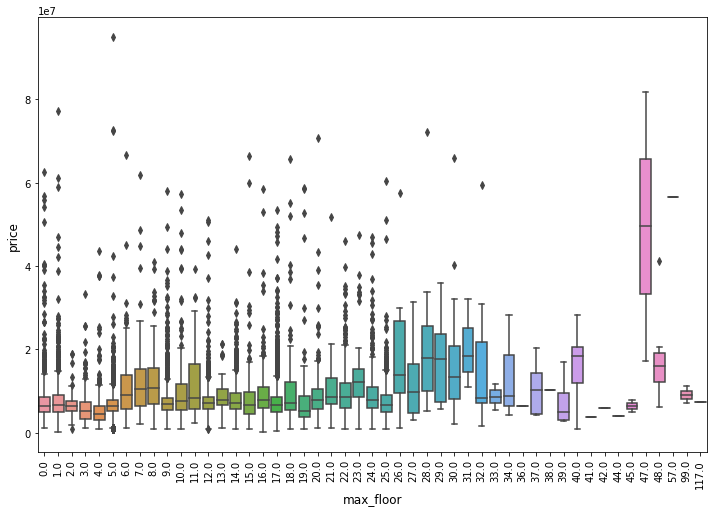

In [19]:
# боксплот цены от количества этажей в доме
# условно можно разделить на группы: до 5 этажа включительно - дешевые пятиэтажки, от 6 до 25 этажа, от 26 до 32 этажа
# выброс для 4-этажного здания - максимальная цена

plt.figure(figsize=(12,8))
sns.boxplot(x='max_floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('max_floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

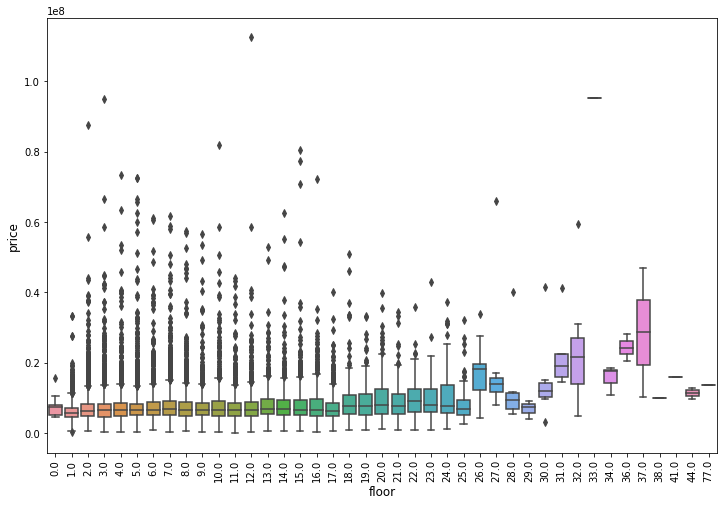

In [20]:
# зависимости цены от этажа квартиры
# медианное изменение не такое большое
# надо внимательно посмотреть на выброс на 12 этаже

plt.figure(figsize=(12,8))
sns.boxplot(x='floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

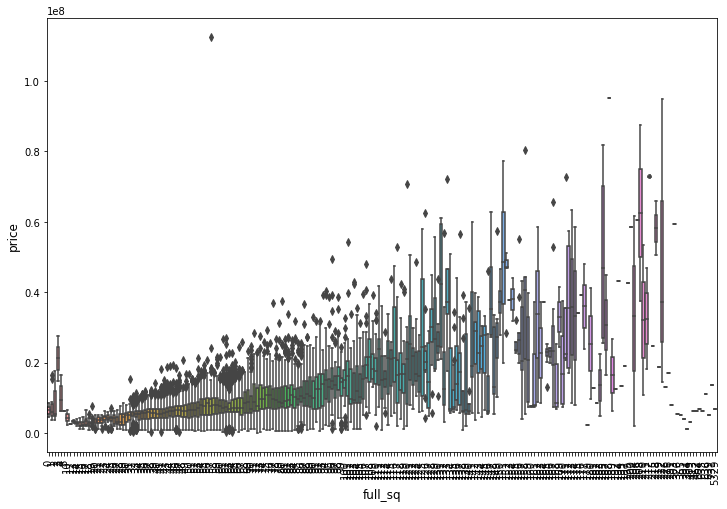

CPU times: user 4.47 s, sys: 135 ms, total: 4.6 s
Wall time: 4.66 s


In [21]:
%%time
# зависимость цены от общей площади
# виден разлет значений

plt.figure(figsize=(12,8))
sns.boxplot(x='full_sq', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

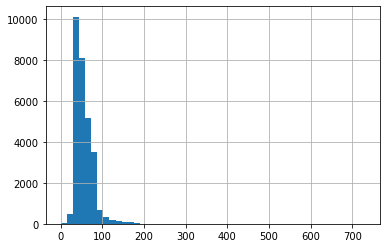

In [22]:
# посмотрим на распределение площади до 1000
# много значений до 100, далее - длинный хвост

train_main_df[train_main_df.full_sq < 1000].full_sq.hist(bins=50)

In [23]:
# бинаризуем данные по площади
# длинный хвост пойдет в последний бин

bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
train_main_df['full_sq_bins'] = np.searchsorted(bins, train_main_df.full_sq.values)

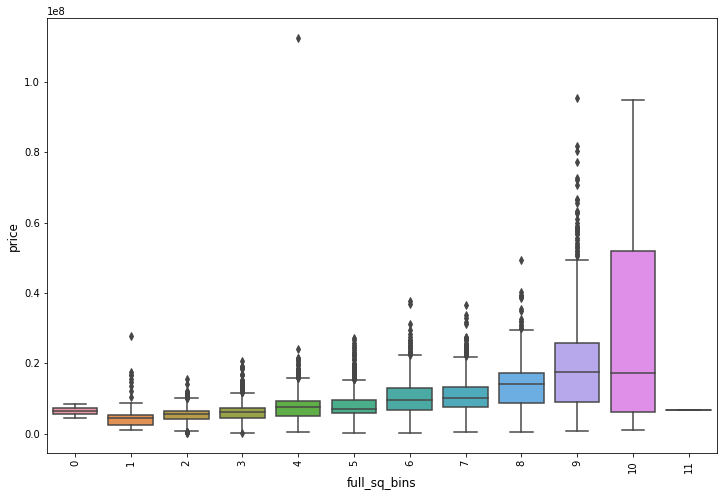

In [24]:
# построим зависимость цены по категориям, полученным на предыдущем шаге
# выбросы в 4 и 9 бине - желательно посмотреть отдельно

plt.figure(figsize=(12, 8))
sns.boxplot(x='full_sq_bins', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq_bins', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# # снова посмтроим попарные графики, обратим внимание на новые для цены
# # колонки на графиках - дискретные значения

# sns.pairplot(whole_train_df)

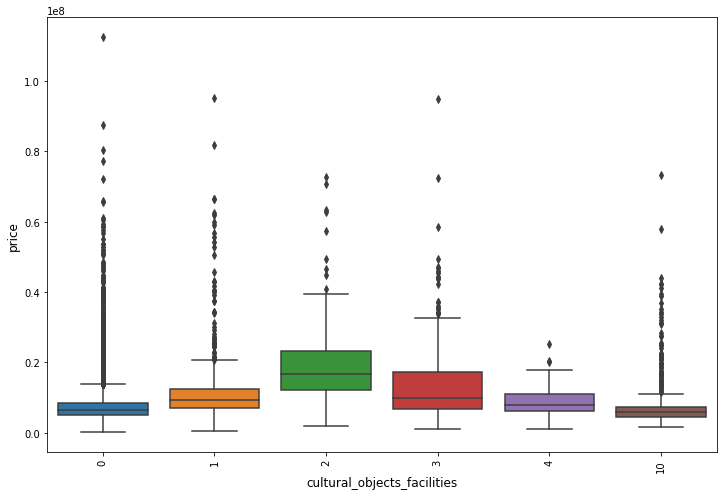

In [26]:
# посмотрим на зависимость цены от количества окружающих культурных объектов
# возможно, стоит посмотреть на записи с culture_objects_facilities == 10

plt.figure(figsize=(12, 8))
sns.boxplot(x='culture_objects_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('cultural_objects_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

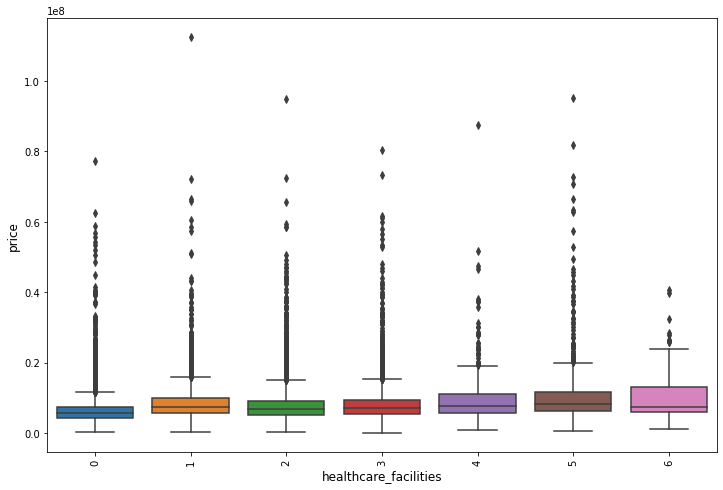

In [27]:
# зависимость цены от количества объектов здравоохранения
# медиана практически не изменяется

plt.figure(figsize=(12, 8))
sns.boxplot(x='healthcare_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('healthcare_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

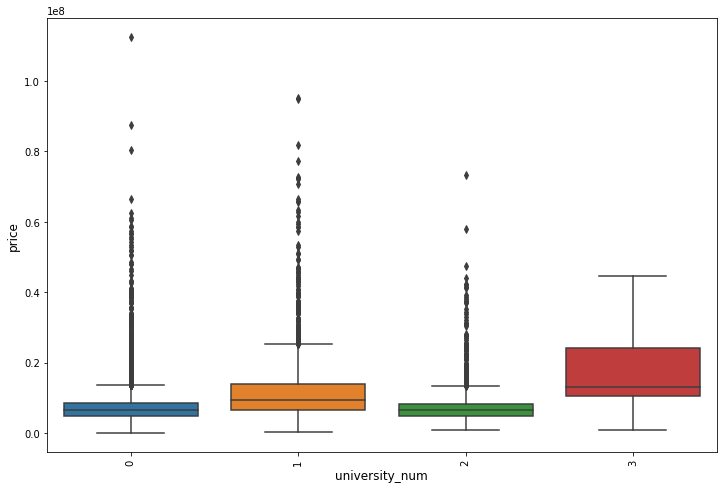

In [28]:
# зависимость цены от количества университетов рядом
# дороже квартиры, где рядом 1 или 3 университета

plt.figure(figsize=(12, 8))
sns.boxplot(x='university_num', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('university_num', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

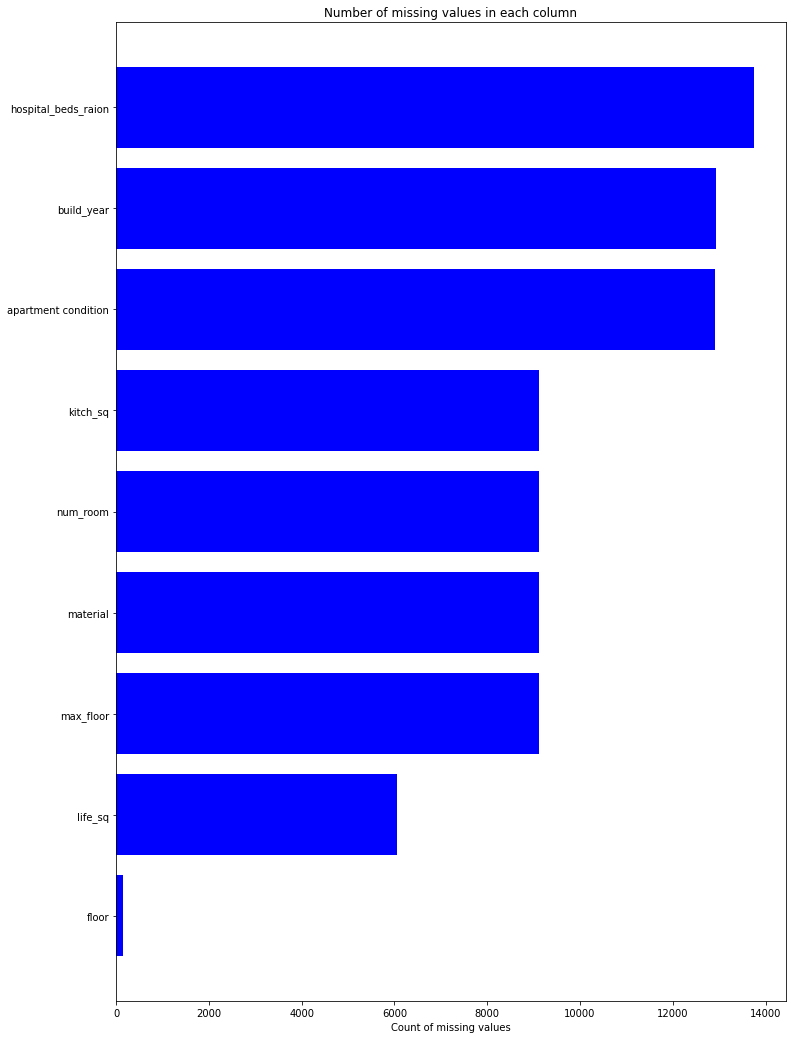

In [29]:
# посмотрим на количество пропусков в данных

missing_df = whole_train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df['missing_count'], color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# EDA 2 (my)

In [380]:
color = sns.color_palette()
%matplotlib inline

In [381]:
# option to expand max number of dataframe in "out"
pd.set_option('display.max_columns', 35)

## groups of features: real, categorical, target

In [18]:
whole_train_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04,29000.000000,29000.000000,29000.000000,29000.000000,15253.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06,84061.314690,0.118992,4.065586,4.704483,1190.744247,1.320862,0.138966,6.641483,2.896690,0.289034,4.207276,8.299793,13.337734,5.717121,3.895103,0.588172,0.005069,0.069862
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06,57811.852151,0.118791,2.991184,3.441177,1057.236330,1.492251,0.444746,6.583770,3.292433,1.518593,4.750353,23.649913,15.986055,11.520025,11.358709,2.178019,0.071017,0.385272
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05,2546.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06,21819.000000,0.019509,2.000000,2.000000,520.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06,83502.000000,0.072158,4.000000,5.000000,990.000000,1.000000,0.000000,5.000000,2.000000,0.000000,3.000000,2.000000,8.365000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06,122862.000000,0.195781,6.000000,7.000000,1786.000000,2.000000,0.000000,10.000000,4.000000,0.000000,6.000000,5.000000,19.920000,5.760000,3.000000,0.000000,0.000000,0.000000
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08,247469.000000,0.521867,13.000000,14.000000,4849.000000,6.000000,3.000000,29.000000,16.000000,10.000000,23.000000,141.000000,100.000000,98.770000,120.000000,17.000000,1.000000,9.000000


In [20]:
whole_train_df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'price', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities'],
      dtype='object')

In [132]:
var_target = ['price']
var_tech = ['id', 'timestamp']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities']
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_train_df.columns) - set(var_real) - set(var_target) - set(var_tech) - set(['price_log'])

In [133]:
var_cat

{'apartment condition',
 'apartment_condition_2.0',
 'apartment_condition_3.0',
 'apartment_condition_33.0',
 'apartment_condition_4.0',
 'material',
 'material_2.0',
 'material_3.0',
 'material_4.0',
 'material_5.0',
 'material_6.0'}

In [ ]:
# flats with 0 rooms

In [36]:
np.mean(whole_train_df.loc[whole_train_df.num_room != 0, 'life_sq'] / whole_train_df.loc[whole_train_df.num_room != 0, 'num_room'])

18.585764848327088

In [93]:
whole_train_df[(whole_train_df["culture_objects_facilities"] >= 10)].sub_area.unique()

array([134])

In [94]:
whole_train_df[(whole_train_df["culture_objects_facilities"] >= 10)].price.describe()

count    6.530000e+02
mean     7.475652e+06
std      6.792775e+06
min      1.662800e+06
25%      4.522100e+06
50%      5.877200e+06
75%      7.243300e+06
max      7.337770e+07
Name: price, dtype: float64

### analyze price (target var)

In [25]:
whole_train_df['price'].describe()

count    2.900000e+04
mean     7.472051e+06
std      5.056736e+06
min      1.085000e+05
25%      4.957875e+06
50%      6.553400e+06
75%      8.674925e+06
max      1.124444e+08
Name: price, dtype: float64

In [749]:
whole_train_df.price
print('perc 1% ', np.percentile(whole_train_df.price, 1, axis=None, out=None).round(0))
print('perc 5% ', np.percentile(whole_train_df.price, 5, axis=None, out=None).round(0))
print('perc 10% ', np.percentile(whole_train_df.price, 10, axis=None, out=None).round(0))
print('perc 90% ', np.percentile(whole_train_df.price, 90, axis=None, out=None).round(0))
print('perc 95% ', np.percentile(whole_train_df.price, 95, axis=None, out=None).round(0))
print('perc 99% ', np.percentile(whole_train_df.price, 99, axis=None, out=None).round(0))
print('perc 99% ', np.percentile(whole_train_df.price, 99, axis=None, out=None).round(0))

perc 1%  1018000.0
perc 5%  2047440.0
perc 10%  3209450.0
perc 90%  12320160.0
perc 95%  15210195.0
perc 99%  26141509.0
perc 99%  34089762.0


112444400.0

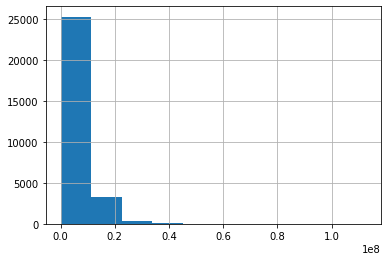

In [747]:
whole_train_df.price.hist()
whole_train_df.price.max()

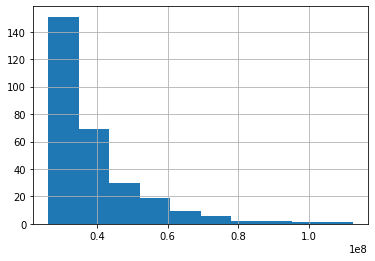

In [759]:
whole_train_df.loc[whole_train_df.price > whole_train_df.price.quantile(0.99), 'price'].hist()

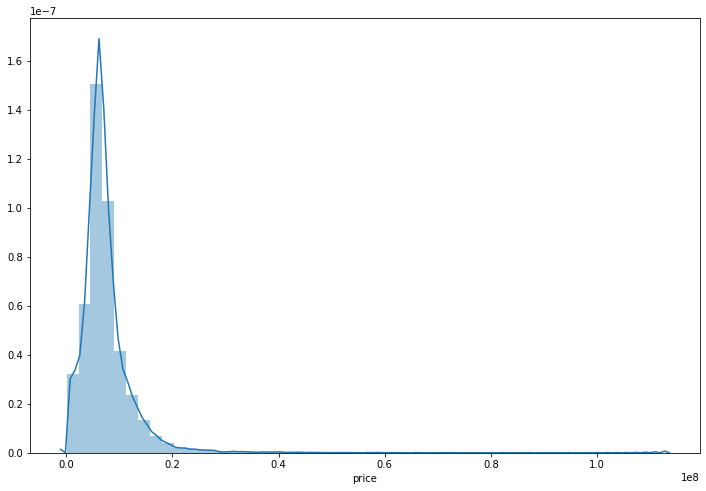

In [37]:
# нарисуем распределение цены
plt.figure(figsize=(12, 8))
sns.distplot(whole_train_df.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

In [118]:
whole_train_df['price_log'] = whole_train_df.price.apply(lambda w: np.log(w + 1))

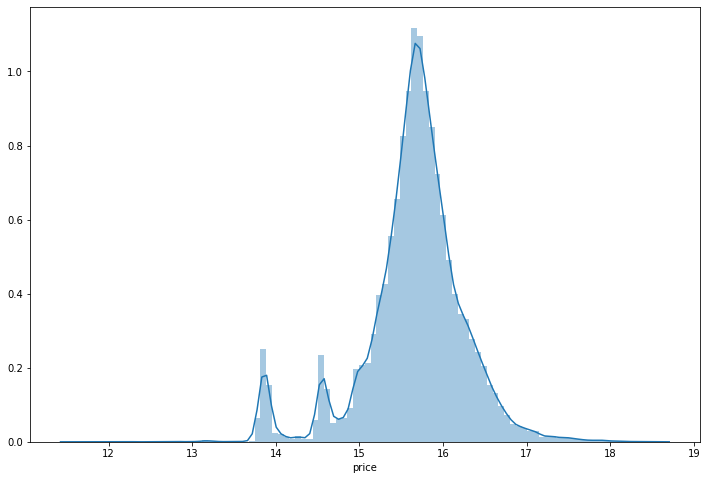

In [119]:
plt.figure(figsize=(12, 8))
sns.distplot(whole_train_df.price_log.values, bins=100, kde=True)
plt.xlabel('price')
plt.show()

In [ ]:
### analyze real vars

In [42]:
whole_train_df[var_real].describe()

,full_sq,life_sq,floor,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
count,29000.000000,22935.000000,28843.000000,29000.000000,22935.000000,28843.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,29000.000000,29000.000000,29000.000000,29000.000000,15253.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000
mean,55.235345,34.103248,7.665326,55.235345,34.103248,7.665326,12.560567,3.126422e+03,1.908282,6.424297,84061.314690,0.118992,4.065586,4.704483,1190.744247,1.320862,0.138966,6.641483,2.896690,0.289034,4.207276,8.299793,13.337734,5.717121,3.895103,0.588172,0.005069,0.069862
std,38.781299,20.911329,5.319891,38.781299,20.911329,5.319891,6.775449,1.582194e+05,0.853043,28.960510,57811.852151,0.118791,2.991184,3.441177,1057.236330,1.492251,0.444746,6.583770,3.292433,1.518593,4.750353,23.649913,15.986055,11.520025,11.358709,2.178019,0.071017,0.385272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2546.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,20.000000,3.000000,40.000000,20.000000,3.000000,9.000000,1.966000e+03,1.000000,1.000000,21819.000000,0.019509,2.000000,2.000000,520.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,30.000000,6.000000,50.000000,30.000000,6.000000,12.000000,1.979000e+03,2.000000,6.000000,83502.000000,0.072158,4.000000,5.000000,990.000000,1.000000,0.000000,5.000000,2.000000,0.000000,3.000000,2.000000,8.365000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,64.000000,43.000000,11.000000,64.000000,43.000000,11.000000,17.000000,2.005000e+03,2.000000,9.000000,122862.000000,0.195781,6.000000,7.000000,1786.000000,2.000000,0.000000,10.000000,4.000000,0.000000,6.000000,5.000000,19.920000,5.760000,3.000000,0.000000,0.000000,0.000000
max,5329.000000,802.000000,77.000000,5329.000000,802.000000,77.000000,117.000000,2.005201e+07,19.000000,2014.000000,247469.000000,0.521867,13.000000,14.000000,4849.000000,6.000000,3.000000,29.000000,16.000000,10.000000,23.000000,141.000000,100.000000,98.770000,120.000000,17.000000,1.000000,9.000000


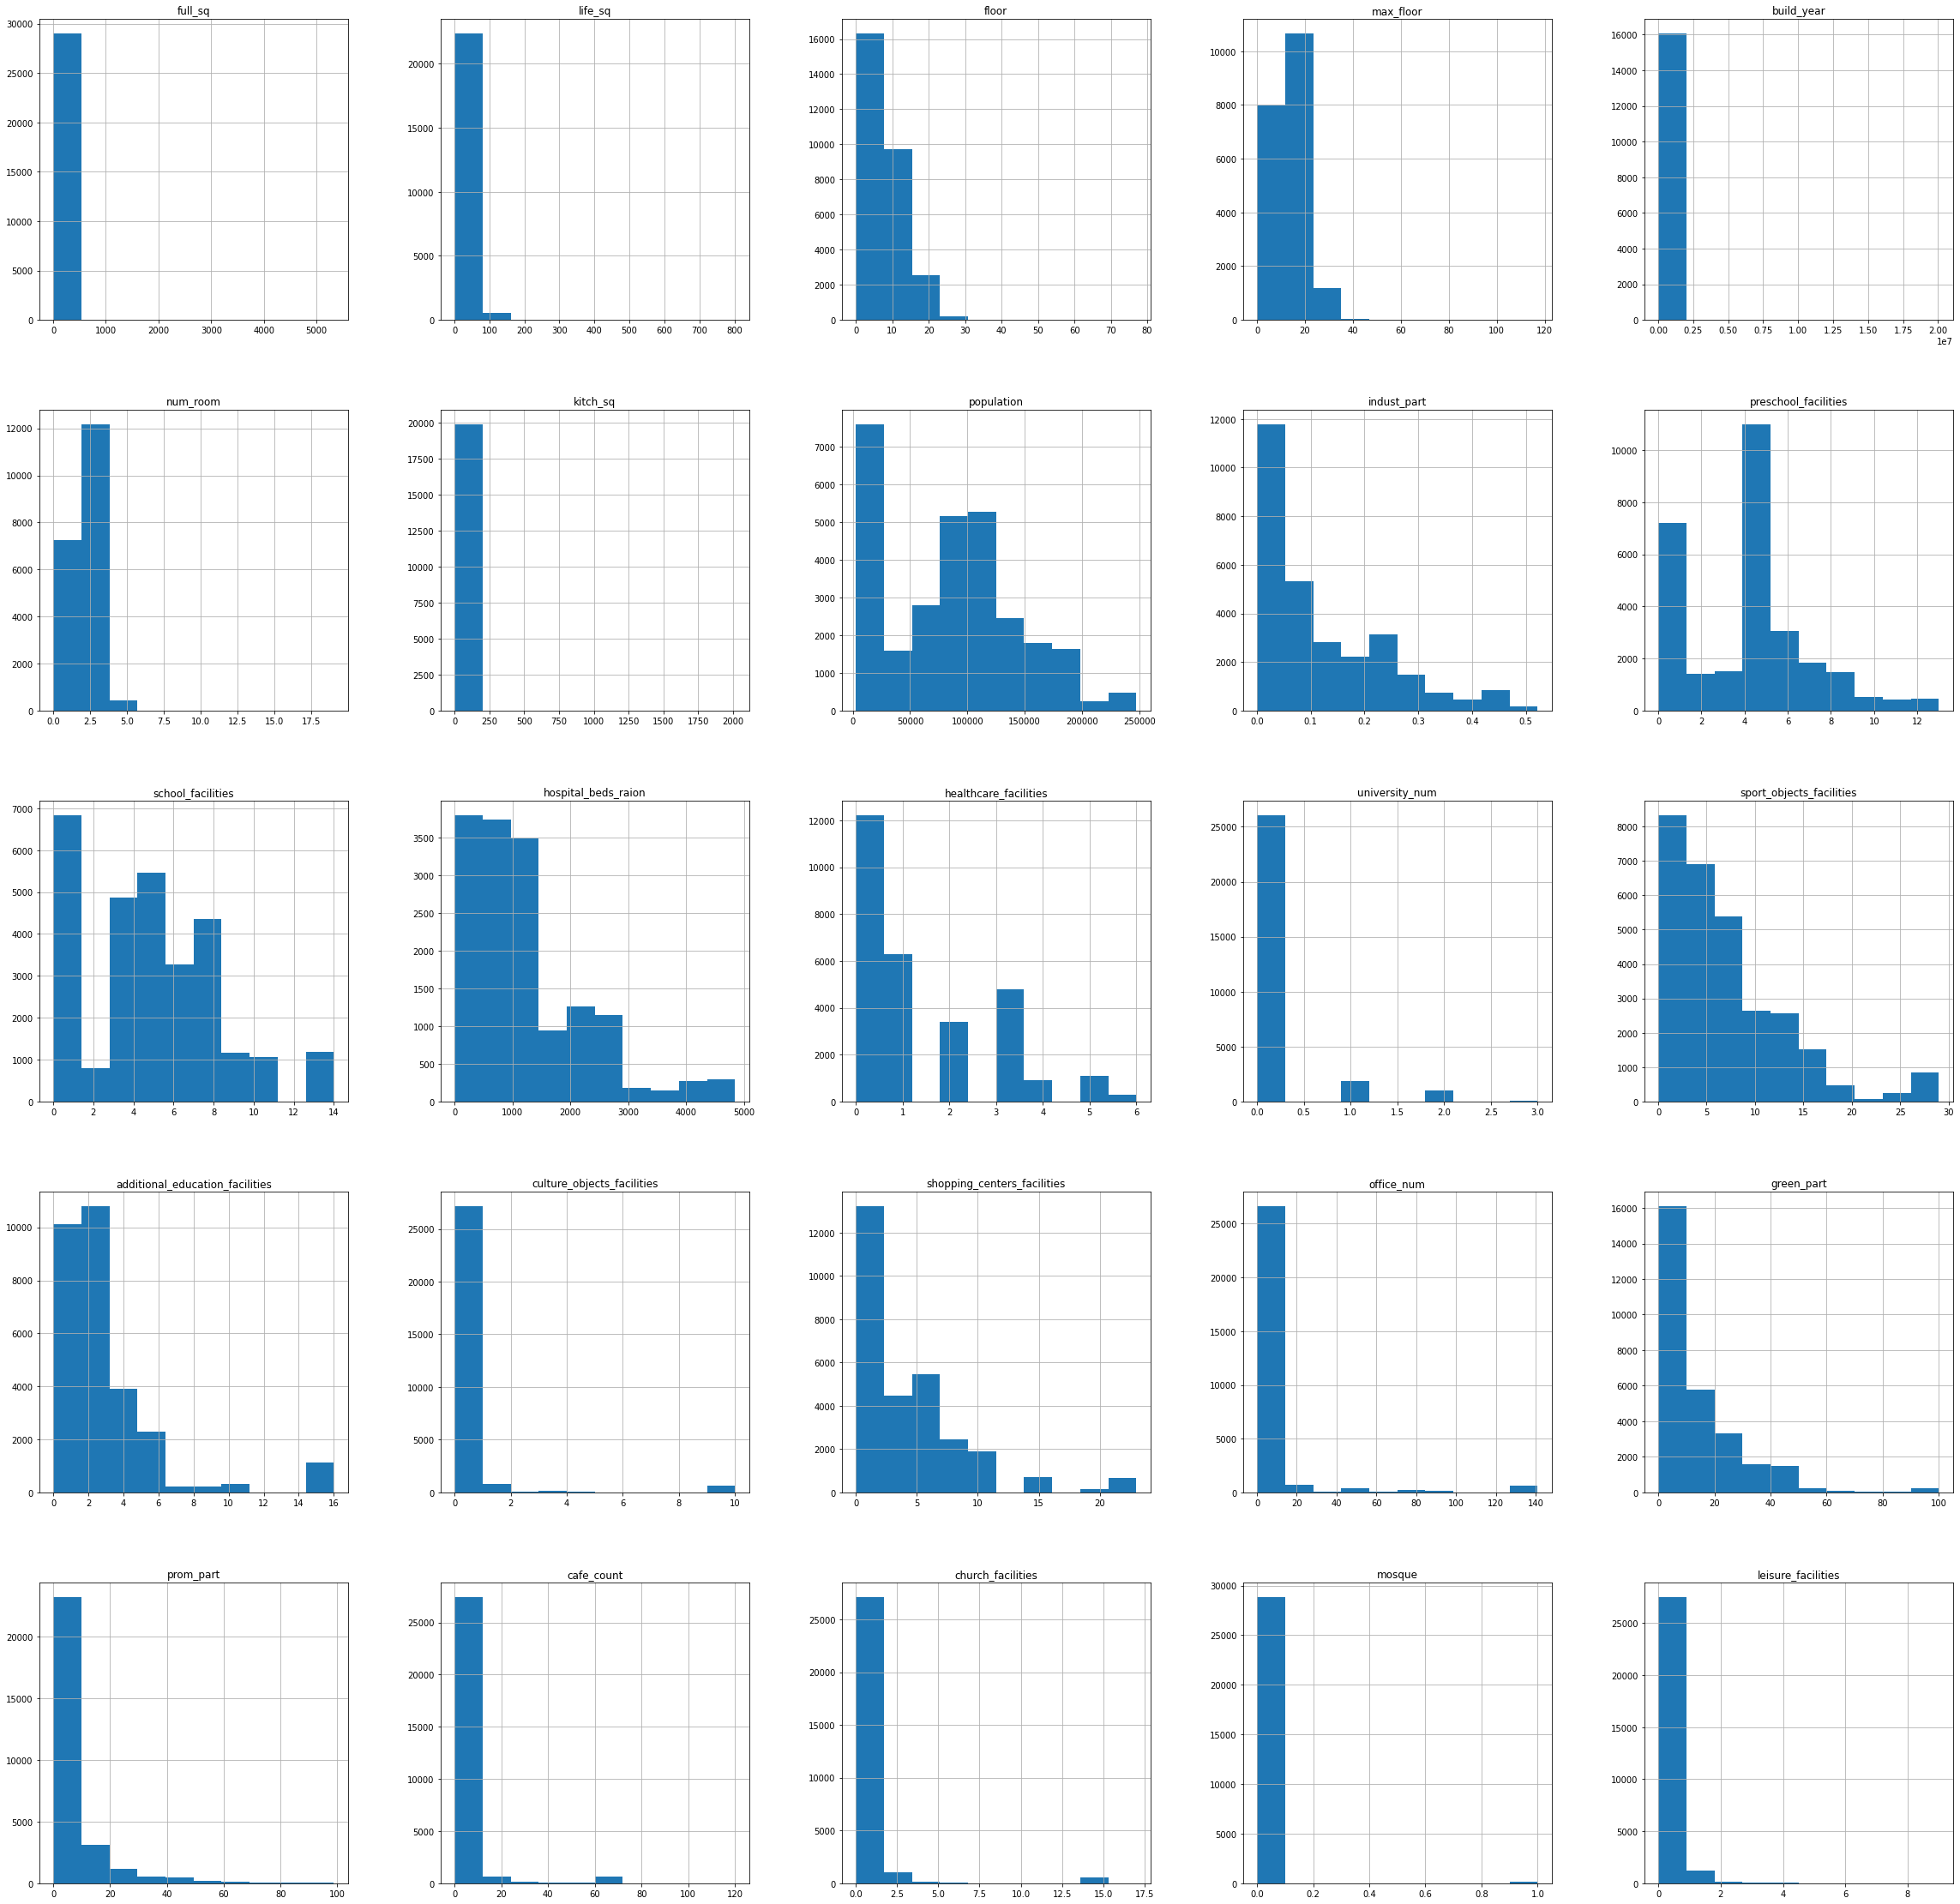

In [50]:
whole_train_df[var_real].hist(figsize=(40, 40));

In [120]:
def log_col(w):
#     return np.log(x + 1) if x >= 0 else x
    try: 
        return w.apply(lambda x: np.log(x + 1) if x >= 0 else x)
    except:
        return w

In [121]:
%%time
# log all real vars
whole_train_df[var_real] = whole_train_df[var_real].apply(log_col, axis = 1)
# whole_train_df[var_real] = whole_train_df[var_real].apply(log_col) # faster

CPU times: user 10.1 s, sys: 107 ms, total: 10.2 s
Wall time: 10.2 s


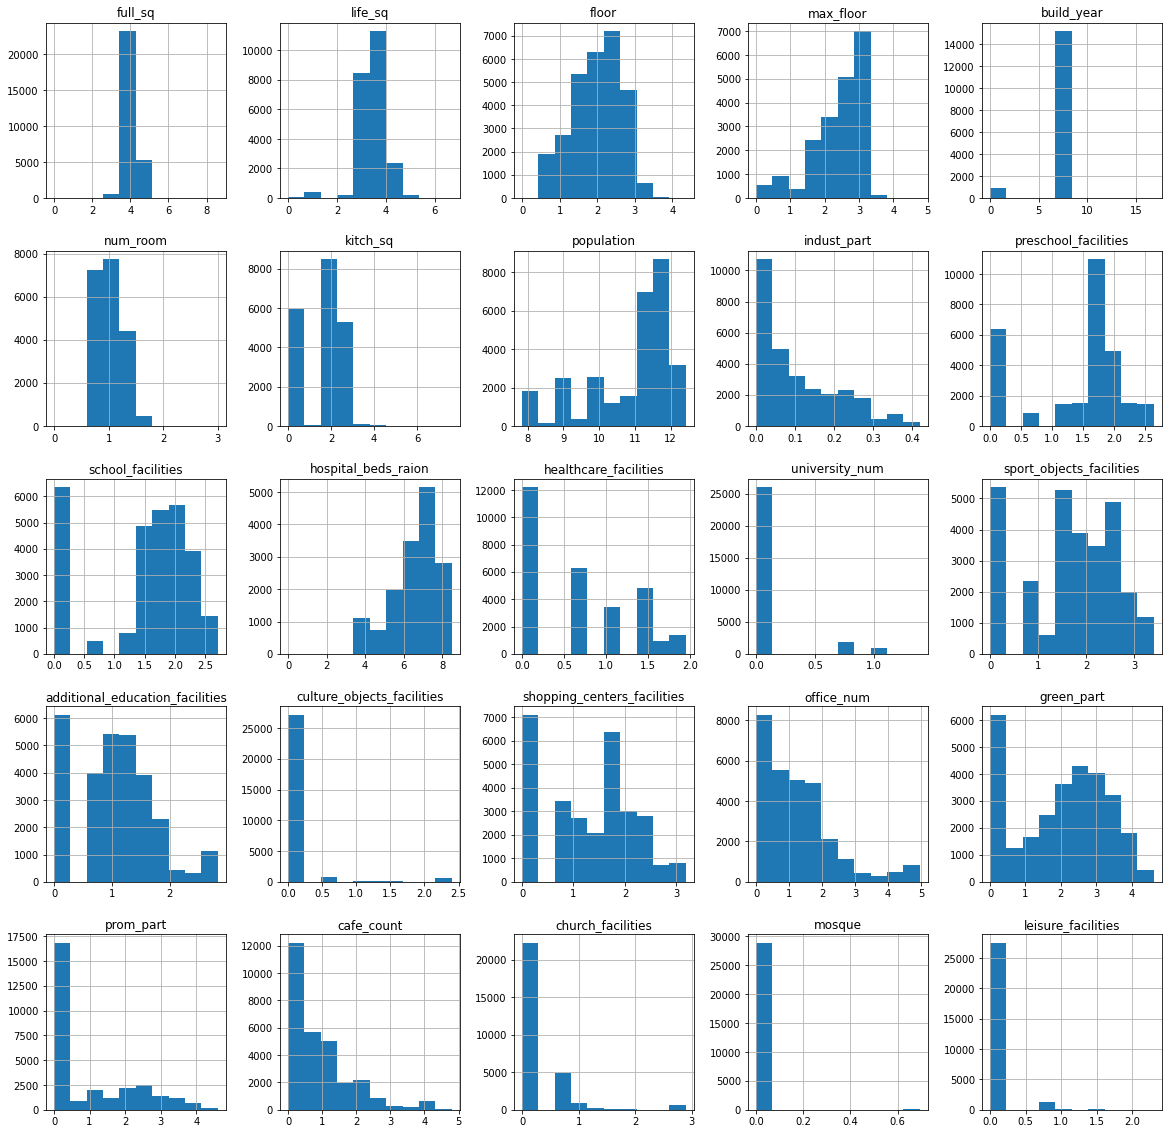

In [83]:
whole_train_df[var_real].hist(figsize=(20, 20));

## categorical features hist

In [96]:
whole_train_df[var_cat].describe()

,sub_area,apartment condition,material
count,29000.000000,16088.000000,19887.000000
mean,76.503931,2.108031,1.821491
std,39.308253,0.882274,1.475440
min,0.000000,1.000000,1.000000
25%,44.000000,1.000000,1.000000
50%,78.000000,2.000000,1.000000
75%,105.000000,3.000000,2.000000
max,145.000000,33.000000,6.000000


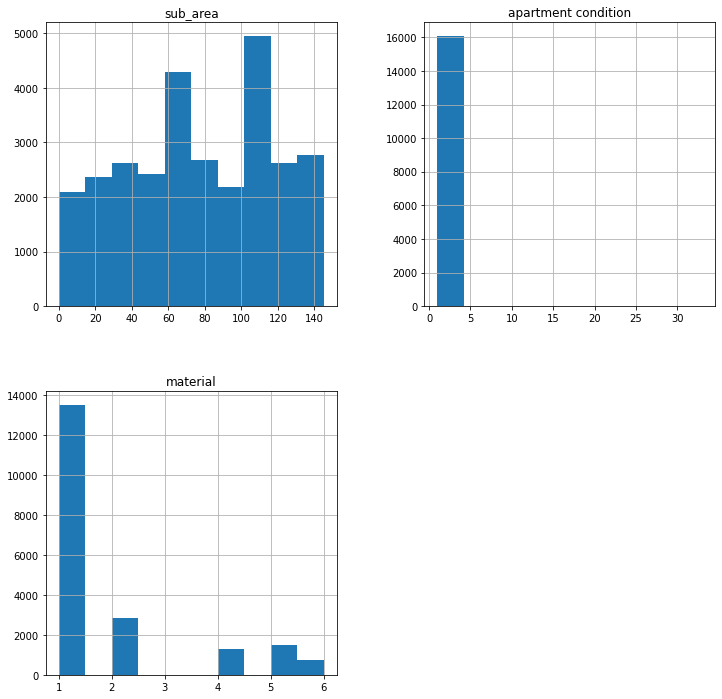

In [97]:
whole_train_df[var_cat].hist(figsize=(12, 12));

In [122]:
## one hot encoding of categorical vars
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['apartment condition'], drop_first = True, prefix = 'apartment_condition'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['material'], drop_first = True, prefix = 'material'))

## fill NAs

In [34]:
var_target = ['price']
var_tech = ['id', 'timestamp', 'sub_area']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities']
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_train_df.columns) - set(var_real) - set(var_target) - set(var_tech) - set(['price_log'])

In [35]:
var_real # by medians
var_cat # by 'other vals'

{'apartment condition', 'material'}

In [36]:
whole_train_df[var_real]

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,sub_area,population,indust_part,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,60,36.0,6.0,9.0,1974.0,3.0,5.0,9,155572,0.000070,...,3,0,16,1,2.86,0.00,0,0,0,0
1,44,29.0,9.0,NaN,NaN,NaN,NaN,19,111874,0.089040,...,3,0,11,5,9.26,2.71,1,0,0,0
2,62,60.0,4.0,NaN,NaN,NaN,NaN,80,129207,0.007720,...,2,0,4,2,13.80,0.00,4,0,0,0
3,33,18.0,4.0,9.0,1970.0,1.0,6.0,15,125354,0.265089,...,4,0,2,0,7.46,0.00,1,0,0,0
4,37,14.0,1.0,17.0,1991.0,1.0,1.0,74,111023,0.025609,...,4,0,1,0,0.00,0.00,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,58,NaN,2.0,NaN,NaN,NaN,NaN,101,32241,0.211401,...,3,0,1,0,9.26,7.02,0,0,0,0
28996,38,NaN,9.0,17.0,NaN,1.0,1.0,134,75377,0.000078,...,16,10,23,141,12.24,0.00,71,15,0,0
28997,55,30.0,9.0,16.0,2002.0,2.0,8.0,38,178264,0.041116,...,4,0,4,4,12.32,0.00,0,0,0,0
28998,37,19.0,3.0,16.0,1979.0,1.0,9.0,43,153248,0.135650,...,3,0,11,6,39.80,7.01,3,0,0,0


In [37]:
def fill_by_medians(colx):
    colx_median = np.median(colx.dropna())
    return colx.fillna(colx_median)

In [38]:
whole_train_df[var_real] = whole_train_df[var_real].apply(fill_by_medians, axis = 1)

In [39]:
for v_cat in var_cat:
    whole_train_df[v_cat].fillna('other', inplace = True)

In [ ]:
whole_train_df.isnull().sum(axis=0).reset_index()

# Data preparation

Добавить структуру: \
fill NAs + save extra (eg medians) data for equal generating on test \
generate features + save extra (eg sub_area:sub_area_bin) data for equal generating on test \
data transformation (eg log())

In [10]:
whole_train_df = whole_train_df_to_data_prep

In [11]:
whole_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               29000 non-null  int64         
 1   timestamp                        29000 non-null  datetime64[ns]
 2   full_sq                          29000 non-null  int64         
 3   life_sq                          22935 non-null  float64       
 4   floor                            28843 non-null  float64       
 5   max_floor                        19887 non-null  float64       
 6   material                         19887 non-null  float64       
 7   build_year                       16059 non-null  float64       
 8   num_room                         19887 non-null  float64       
 9   kitch_sq                         19887 non-null  float64       
 10  apartment condition              16088 non-null  float64  

In [12]:
whole_train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


In [13]:
whole_train_df['timestamp'] = pd.to_datetime(whole_train_df['timestamp'])

## fill NAs

In [14]:
# check for zero full_sq
whole_train_df.loc[whole_train_df.full_sq == 0, 'full_sq'] = \
    whole_train_df[whole_train_df.full_sq == 0]['life_sq'] * \
    (1 + 0.5 / whole_train_df[whole_train_df.full_sq == 0]['num_room'])
whole_train_df.loc[whole_train_df.full_sq == np.inf, 'full_sq']
whole_train_df.loc[whole_train_df.full_sq == -np.inf, 'full_sq']
whole_train_df.loc[whole_train_df.full_sq == None, 'full_sq']
whole_train_df.full_sq.describe()

# fill num_room

whole_train_df.num_room.replace([np.inf, -np.inf], np.nan, inplace=True)
whole_train_df.loc[whole_train_df.num_room == 0, 'num_room'] = \
    round(whole_train_df[whole_train_df.num_room == 0]['life_sq'] / 18.5857)
whole_train_df.loc[np.isnan(whole_train_df.num_room), 'num_room'] = \
    round(whole_train_df[np.isnan(whole_train_df.num_room)]['life_sq'] / 18.5857)
whole_train_df.loc[np.isnan(whole_train_df.num_room), 'num_room'] = \
    round(whole_train_df[np.isnan(whole_train_df.num_room)]['full_sq'] / 31.5)

print(whole_train_df.loc[whole_train_df.full_sq == np.nan, ])
print(whole_train_df.num_room.describe())
whole_train_df.loc[pd.isnull(whole_train_df.num_room)]

Empty DataFrame
Columns: [id, timestamp, full_sq, life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, apartment condition, sub_area, price, population, indust_part, preschool_facilities, school_facilities, hospital_beds_raion, healthcare_facilities, university_num, sport_objects_facilities, additional_education_facilities, culture_objects_facilities, shopping_centers_facilities, office_num, green_part, prom_part, cafe_count, church_facilities, mosque, leisure_facilities]
Index: []
count    29000.000000
mean         1.897448
std          0.953106
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         43.000000
Name: num_room, dtype: float64


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities


In [15]:
# добавим дополнительные столбцы на основе имеющейся даты
# конвертируем колонку в datetime
whole_train_df['timestamp'] = pd.to_datetime(whole_train_df['timestamp'])

In [16]:
## add usd data
usd_rub_df = pd.DataFrame(usd_rub_df)
usd_rub_df['date'] = pd.to_datetime(usd_rub_df['date'])
whole_train_df = whole_train_df.merge(usd_rub_df, how='left', left_on='timestamp', right_on='date').drop('date', axis=1)

In [17]:
def fill_by_medians(colx):
    colx_median = np.median(colx.dropna())
    return colx.fillna(colx_median)

In [18]:
var_target = ['price', 'is_expensive']
var_tech = ['id', 'timestamp', 'sub_area', 'timestamp_int']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor', 'full_sq_bins',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities', 
    'usd_rub' 
]
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_train_df.columns) - set(var_real) - set(var_target) - set(var_tech) - set(['price_log'])


In [19]:
# бинаризуем данные по площади
# длинный хвост пойдет в последний бин
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
whole_train_df['full_sq_bins'] = np.searchsorted(bins, whole_train_df.full_sq.values)

# get year
whole_train_df['year'] = whole_train_df.timestamp.dt.year

# get month of year
whole_train_df['month'] = whole_train_df.timestamp.dt.month

# get day of week
whole_train_df['week_of_year'] = whole_train_df.timestamp.dt.weekofyear

# get week of the year
whole_train_df['day_of_week'] = whole_train_df.timestamp.dt.weekday

# whole_train_df['timestamp_int'] = whole_train_df.timestamp.astype(int)
# whole_train_df['timestamp_int'] = int(whole_train_df.timestamp)
whole_train_df['timestamp_int'] = pd.to_numeric(whole_train_df.timestamp)

# заполним все пропуски константой
# вы можете выбрать более подходящий вариант
# whole_train_df.fillna(-99, inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [20]:
# заполним все пропуски константой
# вы можете выбрать более подходящий вариант
# whole_train_df.fillna(-99, inplace=True)

# fill NAs by medians
# whole_train_df[var_real] = whole_train_df[var_real].apply(fill_by_medians, axis = 1)
whole_train_df[var_real] = whole_train_df[var_real].apply(fill_by_medians)

In [21]:
# fill NAs by class 'other'
for v_cat in var_cat:
    whole_train_df[v_cat].fillna('other', inplace = True)

In [22]:
## one hot encoding of categorical vars
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['apartment condition'], drop_first = True, prefix = 'apartment_condition'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['material'], drop_first = True, prefix = 'material'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['day_of_week'], drop_first = True, prefix = 'day_of_week'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['month'], drop_first = True, prefix = 'month'))
# whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['sub_area'], drop_first = True, prefix = 'sub_area'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['week_of_year'], drop_first = True, prefix = 'week_of_year'))
whole_train_df = whole_train_df.join(pd.get_dummies(whole_train_df['year'], drop_first = True, prefix = 'year'))

In [23]:
# check for NAs
whole_train_df.isnull().sum(axis=0).reset_index().sort_values(by='index', ascending=False)

,index,0
120,year_2015,0
119,year_2014,0
118,year_2013,0
117,year_2012,0
33,year,0
...,...,...
41,apartment_condition_33.0,0
39,apartment_condition_3.0,0
38,apartment_condition_2.0,0
10,apartment condition,0


In [24]:
# check for INFs
ds = whole_train_df.isin([np.inf, -np.inf])
ds.sum(axis=0).sort_values(ascending=False).head()

year_2015       0
month_6         0
usd_rub         0
full_sq_bins    0
year            0
dtype: int64

In [25]:
whole_train_df['price_per_meter'] = whole_train_df['price'] / (whole_train_df['full_sq'] + 1.e-10)

In [26]:
# бинаризуем данные по площади
# длинный хвост пойдет в последний бин
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
whole_train_df['full_sq_bins'] = np.searchsorted(bins, whole_train_df.full_sq.values)

# get year
whole_train_df['year'] = whole_train_df.timestamp.dt.year

# get month of year
whole_train_df['month'] = whole_train_df.timestamp.dt.month

# get day of week
whole_train_df['week_of_year'] = whole_train_df.timestamp.dt.weekofyear

# get week of the year
whole_train_df['day_of_week'] = whole_train_df.timestamp.dt.weekday

# whole_train_df['timestamp_int'] = whole_train_df.timestamp.astype(int)
# whole_train_df['timestamp_int'] = int(whole_train_df.timestamp)
whole_train_df['timestamp_int'] = pd.to_numeric(whole_train_df.timestamp)

# заполним все пропуски константой
# вы можете выбрать более подходящий вариант
# whole_train_df.fillna(-99, inplace=True)

# fill NAs by medians
# whole_train_df[var_real] = whole_train_df[var_real].apply(fill_by_medians, axis = 1)
whole_train_df[var_real] = whole_train_df[var_real].apply(fill_by_medians)

# check for NAs
whole_train_df.isnull().sum(axis=0).reset_index().sort_values(by=0, ascending=False)

# check for Inf's

ds = whole_train_df.isin([np.inf, -np.inf]) 
ds.sum().sort_values(ascending=False).head()


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


price_per_meter       0
leisure_facilities    0
full_sq_bins          0
year                  0
month                 0
dtype: int64

## add new features

In [27]:
# add new dummies

whole_train_df["num_room_10_plus"] = (whole_train_df["num_room"] >= 10).astype(int)
whole_train_df["max_floor_5"] = (whole_train_df["max_floor"] < 6).astype(int)
whole_train_df["max_floor_6_25"] = ((5 < whole_train_df["max_floor"]) & (whole_train_df["max_floor"] < 26)).astype(int)
whole_train_df["max_floor_26_32"] = ((25 < whole_train_df["max_floor"]) & (whole_train_df["max_floor"] < 33)).astype(int)
whole_train_df["max_floor_33_plus"] = (whole_train_df["max_floor"] > 32).astype(int)
whole_train_df['culture_objects_facilities_2'] = (whole_train_df["culture_objects_facilities"] == 2).astype(int)
whole_train_df['culture_objects_facilities_10'] = (whole_train_df["culture_objects_facilities"] <= 10).astype(int)
whole_train_df['university_num_1'] = (whole_train_df["university_num"] == 1).astype(int)
whole_train_df['university_num_3'] = (whole_train_df["university_num"] == 3).astype(int)

In [28]:
# вспомним, что цена сильно зависит от площади квартиры, на основе этих данных
# добавим столбцы для отношения площадей
whole_train_df["ratio_life_dash_full_sq"] = whole_train_df["life_sq"] / (whole_train_df["full_sq"] + 1.e-10)
whole_train_df["ratio_kitchen_dash_full_sq"] = whole_train_df["kitch_sq"] / (whole_train_df["full_sq"] + 1.e-10)

# добавим воздраст здания
whole_train_df['age'] = whole_train_df["build_year"] - whole_train_df['year']

# добавим разность между общей и жилой площадью квартиры
whole_train_df['some_extra_sqr'] = whole_train_df["full_sq"] - whole_train_df["life_sq"]


In [29]:
# добавим среднюю площадь комнат
whole_train_df["ratio_life_sq_dash_n_rooms"] = whole_train_df["life_sq"] / (whole_train_df["num_room"] + 1.e-10)

# добавим среднюю долю нежилых помещений
whole_train_df["ratio_nonlife_sq_dash_full_sq"] = whole_train_df["sub_area"] / (whole_train_df["full_sq"] + 1.e-10)

# добавим проверку на последний этаж
whole_train_df["is_last_floor"] = (whole_train_df["floor"] == whole_train_df["max_floor"]).astype(int)

# добавим проверку на последний этаж
whole_train_df["is_first_floor"] = (whole_train_df["floor"] == 1).astype(int)


In [30]:
## 2021-02-(08-09) add features

In [31]:
## add sub_area_bins
gr_whole_train_df_by_sub_area_price = whole_train_df.groupby(by='sub_area', as_index = False).agg(
    price_per_meter_median = pd.NamedAgg(column = "price_per_meter", aggfunc = np.median)
)
bins_price_per_meter_median = gr_whole_train_df_by_sub_area_price.price_per_meter_median.quantile(q=np.arange(0.1, 1, 0.1))
gr_whole_train_df_by_sub_area_price['sub_area_bin'] = np.searchsorted(bins_price_per_meter_median, gr_whole_train_df_by_sub_area_price['price_per_meter_median'].values)
gr_whole_train_df_by_sub_area_price.head()

,sub_area,price_per_meter_median,sub_area_bin
0,0,192963.414634,8
1,1,198199.999999,9
2,2,191612.903225,8
3,3,143670.588235,2
4,4,299162.790697,9


In [32]:
whole_train_df = whole_train_df.merge(gr_whole_train_df_by_sub_area_price[['sub_area', 'sub_area_bin']],
                     how='left', on='sub_area')

In [33]:
## add extra features

In [34]:
## relative distance to last floor
whole_train_df['dist_to_max_floor_rel'] = (whole_train_df['max_floor'] - whole_train_df['floor']) / whole_train_df['max_floor']
whole_train_df.loc[whole_train_df['dist_to_max_floor_rel'].isnull(), 'dist_to_max_floor_rel'] = 0.5
whole_train_df.loc[np.isinf(whole_train_df['dist_to_max_floor_rel']), 'dist_to_max_floor_rel'] = 0.5


## drop outs

In [35]:
index_cheap = whole_train_df.sort_values(ascending=True, by='price').head(25).index

In [36]:
index_exp = whole_train_df.sort_values(ascending=False, by='price').head(5).index

In [37]:
whole_train_df.drop(index=index_cheap, inplace=True)
whole_train_df.drop(index=index_exp, inplace=True)

## log y

In [38]:
# # log target and real vars
# # whole_train_df['price_log'] = whole_train_df.price.apply(lambda w: np.log(w + 1))
# whole_train_df['price'] = whole_train_df.price.apply(lambda w: np.log(w + 1))

In [39]:
# def log_col(w):
# #     return np.log(x + 1) if x >= 0 else x
#     try: 
#         return w.apply(lambda x: np.log(x + 1) if x >= 0 else x)
#     except:
#         return w

In [40]:
# %%time
# # log all real vars
# # whole_train_df[var_real] = whole_train_df[var_real].apply(log_col, axis = 1)
# whole_train_df[var_real] = whole_train_df[var_real].apply(log_col) # faster

In [41]:
# check for NAs
whole_train_df.isnull().sum(axis=0).reset_index().sort_values(by=0, ascending=False)

,index,0
0,id,0
97,week_of_year_33,0
91,week_of_year_27,0
92,week_of_year_28,0
93,week_of_year_29,0
...,...,...
41,apartment_condition_33.0,0
40,apartment_condition_4.0,0
39,apartment_condition_3.0,0
38,apartment_condition_2.0,0


In [42]:
# check for Inf's

ds = whole_train_df.isin([np.inf, -np.inf]) 
ds.sum().sort_values(ascending=False).head()


dist_to_max_floor_rel    0
material_2.0             0
day_of_week_1            0
material_other           0
material_6.0             0
dtype: int64

In [43]:
whole_train_df[(whole_train_df.ratio_life_dash_full_sq.isnull())]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,...,max_floor_6_25,max_floor_26_32,max_floor_33_plus,culture_objects_facilities_2,culture_objects_facilities_10,university_num_1,university_num_3,ratio_life_dash_full_sq,ratio_kitchen_dash_full_sq,age,some_extra_sqr,ratio_life_sq_dash_n_rooms,ratio_nonlife_sq_dash_full_sq,is_last_floor,is_first_floor,sub_area_bin,dist_to_max_floor_rel


In [44]:
whole_train_df[(whole_train_df.ratio_kitchen_dash_full_sq.isnull())]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,...,max_floor_6_25,max_floor_26_32,max_floor_33_plus,culture_objects_facilities_2,culture_objects_facilities_10,university_num_1,university_num_3,ratio_life_dash_full_sq,ratio_kitchen_dash_full_sq,age,some_extra_sqr,ratio_life_sq_dash_n_rooms,ratio_nonlife_sq_dash_full_sq,is_last_floor,is_first_floor,sub_area_bin,dist_to_max_floor_rel


In [45]:
whole_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28970 entries, 0 to 28999
Columns: 141 entries, id to dist_to_max_floor_rel
dtypes: datetime64[ns](1), float64(21), int64(34), object(2), uint8(83)
memory usage: 15.3+ MB


In [46]:
# в тестовом датафрейме преобразуем колонку к нужному типу

test_main_df.timestamp = pd.to_datetime(test_main_df.timestamp)

In [47]:
test_main_df.timestamp.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                    661
top       2014-02-18 00:00:00
freq                        5
first     2011-10-08 00:00:00
last      2015-07-24 00:00:00
Name: timestamp, dtype: object

In [48]:
whole_train_df.timestamp.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   28970
unique                   1408
top       2014-12-27 00:00:00
freq                       76
first     2011-09-06 00:00:00
last      2015-07-31 00:00:00
Name: timestamp, dtype: object

In [49]:
## final check var types correctness
var_target = ['price']
var_tech = ['id', 'timestamp', 'is_expensive']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor', 'full_sq_bins', 'timestamp_int',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities', 
    
    'dist_to_max_floor_rel', 'age',
    'ratio_kitchen_dash_full_sq', 'ratio_life_dash_full_sq', 'ratio_life_sq_dash_n_rooms',
    'ratio_nonlife_sq_dash_full_sq', 'some_extra_sqr', 'sub_area_bin', 'usd_rub',
    
    "num_room_10_plus", "max_floor_5", "max_floor_6_25", "max_floor_26_32",
    "max_floor_33_plus", 'culture_objects_facilities_2', 'culture_objects_facilities_10',
    'university_num_1', 'university_num_3' 
]
var_excl = ['apartment condition', 'material', 'day_of_week', 'month',
            'sub_area', 'week_of_year', 'year', 'price_per_meter',]
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_train_df.columns) - set(var_real) - set(var_target) - set(var_tech) - \
    set(['price_log']) - set(var_excl)


In [53]:
var_cat

{'apartment_condition_2.0',
 'apartment_condition_3.0',
 'apartment_condition_33.0',
 'apartment_condition_4.0',
 'apartment_condition_other',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'is_first_floor',
 'is_last_floor',
 'material_2.0',
 'material_3.0',
 'material_4.0',
 'material_5.0',
 'material_6.0',
 'material_other',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'week_of_year_10',
 'week_of_year_11',
 'week_of_year_12',
 'week_of_year_13',
 'week_of_year_14',
 'week_of_year_15',
 'week_of_year_16',
 'week_of_year_17',
 'week_of_year_18',
 'week_of_year_19',
 'week_of_year_2',
 'week_of_year_20',
 'week_of_year_21',
 'week_of_year_22',
 'week_of_year_23',
 'week_of_year_24',
 'week_of_year_25',
 'week_of_year_26',
 'week_of_year_27',
 'week_of_year_28',
 'week_of_year_29',
 'week_of_year_3',
 'week_of_year_30',
 'week_of_year_

In [50]:
## save all medians
dict_medians_real = {}
for var_r in var_real:
    dict_medians_real[var_r] = np.median(whole_train_df[var_r])
#     print(np.median(whole_train_df[var_r]))

# Modeling

In [134]:
import xgboost as xgb

In [135]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [136]:
from matplotlib import pyplot

In [137]:
whole_train_df["timestamp_int"] = pd.to_numeric(whole_train_df["timestamp_int"])

In [138]:
# 5%
print(whole_train_df.shape)
whole_train_df_ch = whole_train_df.loc[whole_train_df.price <= whole_train_df.price.quantile(0.95)]
print(whole_train_df_ch.shape)
whole_train_df_ex = whole_train_df.loc[whole_train_df.price > whole_train_df.price.quantile(0.95)]
print(whole_train_df_ex.shape)

# 4%
# print(whole_train_df.shape)
# whole_train_df_ch = whole_train_df.loc[whole_train_df.price <= whole_train_df.price.quantile(0.96)]
# print(whole_train_df_ch.shape)
# whole_train_df_ex = whole_train_df.loc[whole_train_df.price > whole_train_df.price.quantile(0.96)]
# print(whole_train_df_ex.shape)

whole_train_df['is_expensive'] = 0
whole_train_df.loc[whole_train_df.price > whole_train_df.price.quantile(0.95), \
                   'is_expensive'] = 1

(28970, 142)
(27522, 142)
(1448, 142)


In [139]:
# cheap flats
train_X_ch, val_X_ch, train_y_ch, val_y_ch = train_test_split(
    whole_train_df_ch.drop(['price', 'timestamp', 'price_per_meter'], axis=1), whole_train_df_ch.price,
    test_size=0.2)

In [140]:
# exp flats
train_X_ex, val_X_ex, train_y_ex, val_y_ex = train_test_split(
    whole_train_df_ex.drop(['price', 'timestamp', 'price_per_meter'], axis=1), whole_train_df_ex.price,
    test_size=0.2)

In [141]:
col_list = set(var_real).union(set(var_cat)) - set(var_target) - set(var_tech) - set(var_excl)

In [142]:
col_list

{'additional_education_facilities',
 'age',
 'apartment_condition_2.0',
 'apartment_condition_3.0',
 'apartment_condition_33.0',
 'apartment_condition_4.0',
 'apartment_condition_other',
 'build_year',
 'cafe_count',
 'church_facilities',
 'culture_objects_facilities',
 'culture_objects_facilities_10',
 'culture_objects_facilities_2',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'dist_to_max_floor_rel',
 'floor',
 'full_sq',
 'full_sq_bins',
 'green_part',
 'healthcare_facilities',
 'hospital_beds_raion',
 'indust_part',
 'is_first_floor',
 'is_last_floor',
 'kitch_sq',
 'leisure_facilities',
 'life_sq',
 'material_2.0',
 'material_3.0',
 'material_4.0',
 'material_5.0',
 'material_6.0',
 'material_other',
 'max_floor',
 'max_floor_26_32',
 'max_floor_33_plus',
 'max_floor_5',
 'max_floor_6_25',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'mont

## stack 2 models (cheap & expensive flats)

### cheap model

In [66]:
# создадим данные для обучения и валидации

xgb_train_ch = xgb.DMatrix(train_X_ch[col_list], train_y_ch, feature_names = col_list, enable_categorical=True)
xgb_test_ch = xgb.DMatrix(val_X_ch[col_list], val_y_ch, feature_names = col_list, enable_categorical=True)

evallist_ch = [(xgb_test_ch, 'eval'), (xgb_train_ch, 'train')]
train_X_ch, train_y_ch, val_X_ch, val_y_ch
eval_set_ch = [(train_X_ch, train_y_ch), (val_X_ch, val_y_ch)]
evals_result = {}

# reg linear models
xgb_params_ch = {
    'eta': 0.025,
    'max_depth': 4,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
#     'booster': 'gbtree',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight': 20,
    'silent': 1,
    'seed':0
}

In [67]:
%%time
model_ch = xgb.train(params = xgb_params_ch,
                  dtrain = xgb_train_ch, 
                  num_boost_round = 1100,
                  evals = evallist_ch, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 25                  
                 )

[01:31:37] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:37] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:7073625.50000	train-rmse:7144299.00000
[25]	eval-rmse:4188645.25000	train-rmse:4248685.50000
[50]	eval-rmse:2868358.25000	train-rmse:2923931.25000
[75]	eval-rmse:2345181.25000	train-rmse:2392122.75000
[100]	eval-rmse:2163383.50000	train-rmse:2199478.75000
[125]	eval-rmse:2099646.50000	train-rmse:2126247.00000
[150]	eval-rmse:2073436.75000	train-rmse:2093301.25000
[175]	eval-rmse:2060647.25000	train-rmse:2072691.00000
[200]	eval-rmse:2051789.50000	train-rmse:2057284.12500
[225]	eval-rmse:2047248.25000	train-rmse:2045686.12500
[250]	eval

In [68]:
model_ch.feature_names

['day_of_week_2',
 'week_of_year_2',
 'week_of_year_24',
 'school_facilities',
 'month_4',
 'week_of_year_28',
 'full_sq',
 'week_of_year_19',
 'week_of_year_29',
 'week_of_year_44',
 'green_part',
 'floor',
 'timestamp_int',
 'apartment_condition_33.0',
 'kitch_sq',
 'week_of_year_20',
 'day_of_week_5',
 'material_4.0',
 'apartment_condition_2.0',
 'ratio_kitchen_dash_full_sq',
 'week_of_year_39',
 'university_num',
 'church_facilities',
 'week_of_year_5',
 'week_of_year_7',
 'week_of_year_15',
 'max_floor',
 'week_of_year_18',
 'week_of_year_34',
 'num_room',
 'week_of_year_9',
 'apartment_condition_other',
 'week_of_year_14',
 'week_of_year_47',
 'cafe_count',
 'healthcare_facilities',
 'university_num_3',
 'usd_rub',
 'apartment_condition_4.0',
 'max_floor_26_32',
 'max_floor_6_25',
 'age',
 'week_of_year_43',
 'week_of_year_10',
 'month_11',
 'week_of_year_32',
 'month_2',
 'sport_objects_facilities',
 'day_of_week_3',
 'week_of_year_33',
 'week_of_year_36',
 'max_floor_5',
 'cult

### exp model

In [69]:
# создадим данные для обучения и валидации

xgb_train_ex = xgb.DMatrix(train_X_ex[col_list], train_y_ex, feature_names = col_list, enable_categorical=True)
xgb_test_ex = xgb.DMatrix(val_X_ex[col_list], val_y_ex, feature_names = col_list, enable_categorical=True)

evallist_ex = [(xgb_test_ex, 'eval'), (xgb_train_ex, 'train')]
train_X_ex, train_y_ex, val_X_ex, val_y_ex
eval_set_ex = [(train_X_ex, train_y_ex), (val_X_ex, val_y_ex)]
evals_result = {}

# reg linear models
xgb_params_ex = {
    'eta': 0.02,
    'max_depth': 4,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
#     'booster': 'gbtree',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_exild_weight': 5,
    'silent': 1,
    'seed':0
}

In [70]:
%%time
model_ex = xgb.train(params = xgb_params_ex,
                  dtrain = xgb_train_ex, 
                  num_boost_round = 2500,
                  evals = evallist_ex, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 25                  
                 )

[01:31:58] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:58] WARNING: ../src/learner.cc:541: 
Parameters: { min_exild_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:23171598.00000	train-rmse:23947722.00000
[25]	eval-rmse:14772985.00000	train-rmse:15455658.00000
[50]	eval-rmse:9908414.00000	train-rmse:10441494.00000
[75]	eval-rmse:7278241.00000	train-rmse:7540038.50000
[100]	eval-rmse:5997285.50000	train-rmse:5858741.00000
[125]	eval-rmse:5387841.50000	train-rmse:4921234.50000
[150]	eval-rmse:5127268.50000	train-rmse:4392772.50000
[175]	eval-rmse:4999690.50000	train-rmse:4060817.25000
[200]	eval-rmse:4943322.50000	train-rmse:3827367.00000
[225]	eval-rmse:4883938.00000	train-rmse:3

### classifier for expensive flats

In [71]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [72]:
# all flats
train_X, val_X, train_y, val_y = train_test_split(
    whole_train_df.drop(['price', 'timestamp', 'price_per_meter', 'is_expensive'], axis=1), whole_train_df.is_expensive,
    test_size=0.2)

In [73]:
# exp flats
train_X_cl, val_X_cl, train_y_cl, val_y_cl = train_test_split(
    whole_train_df.drop(['price', 'timestamp', 'price_per_meter', 'is_expensive'], axis=1), whole_train_df.is_expensive,
    test_size=0.2)

In [74]:
col_list

{'additional_education_facilities',
 'age',
 'apartment_condition_2.0',
 'apartment_condition_3.0',
 'apartment_condition_33.0',
 'apartment_condition_4.0',
 'apartment_condition_other',
 'build_year',
 'cafe_count',
 'church_facilities',
 'culture_objects_facilities',
 'culture_objects_facilities_10',
 'culture_objects_facilities_2',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'dist_to_max_floor_rel',
 'floor',
 'full_sq',
 'full_sq_bins',
 'green_part',
 'healthcare_facilities',
 'hospital_beds_raion',
 'indust_part',
 'is_first_floor',
 'is_last_floor',
 'kitch_sq',
 'leisure_facilities',
 'life_sq',
 'material_2.0',
 'material_3.0',
 'material_4.0',
 'material_5.0',
 'material_6.0',
 'material_other',
 'max_floor',
 'max_floor_26_32',
 'max_floor_33_plus',
 'max_floor_5',
 'max_floor_6_25',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'mont

In [75]:
# создадим данные для обучения и валидации

xgb_train_cl = xgb.DMatrix(train_X_cl[col_list], train_y_cl, feature_names = col_list, enable_categorical=True)
xgb_test_cl = xgb.DMatrix(val_X_cl[col_list], val_y_cl, feature_names = col_list, enable_categorical=True)

evallist_cl = [(xgb_test_cl, 'eval'), (xgb_train_cl, 'train')]
train_X_cl, train_y_cl, val_X_cl, val_y_cl
eval_set_cl = [(train_X_cl, train_y_cl), (val_X_cl, val_y_cl)]
evals_result = {}

# reg linear models
xgb_params_cl = {
#     'eta': 0.025,
    'eta': 0.02,
    'max_depth': 4,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
    'booster': 'gbtree',
#     'binary': 'logistic',
    'eval_metric': 'logloss',
    'min_clild_weight': 20,
    'silent': 1,
    'seed':0
}

In [76]:
model_cl = XGBClassifier(scale_pos_weight=20)
model_cl = XGBClassifier(
#     n_estimators=1500,
    n_estimators=3000,
    scale_pos_weight=25,
    max_depth=4,
    learning_rate=0.025
)

In [77]:
%%time
model_cl.fit(train_X_cl[col_list],
             train_y_cl, 
             eval_set=[(train_X_cl[col_list], train_y_cl),
                       (val_X_cl[col_list], val_y_cl)],
             verbose=25
            )

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:32:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67408	validation_1-logloss:0.67419
[25]	validation_0-logloss:0.39461	validation_1-logloss:0.39696
[50]	validation_0-logloss:0.28410	validation_1-logloss:0.28772
[75]	validation_0-logloss:0.23387	validation_1-logloss:0.23870
[100]	validation_0-logloss:0.20668	validation_1-logloss:0.21321
[125]	validation_0-logloss:0.18993	validation_1-logloss:0.19753
[150]	validation_0-logloss:0.17696	validation_1-logloss:0.18561
[175]	validation_0-logloss:0.16640	validation_1-logloss:0.17651
[200]	validation_0-logloss:0.15856	validation_1-logloss:0.16962
[225]	validation_0-logloss:0.15178	validation_1-logloss:0.16431
[250]	validation_0-logloss:0.14595	validation_1-logloss:0.15991
[275]	validation_0-logloss:0.14048	validation_1-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
## metrics
# y_pred = model_cl.predict(train_X_cl[col_list])
# y_true = train_y_cl
y_pred = model_cl.predict(val_X_cl[col_list])
y_true = val_y_cl

In [79]:
print(metrics.precision_score(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred))
print(metrics.accuracy_score(y_true, y_pred))
print(metrics.f1_score(y_true, y_pred))

0.6577540106951871
0.8367346938775511
0.9696237487055575
0.7365269461077845


In [332]:
%%time
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
# evaluate model
scores = cross_val_score(model_cl, train_X_cl[col_list], train_y_cl, scoring='roc_auc', cv=cv, n_jobs=-1)
scores
# # summarize performance
# print('Mean ROC AUC: %.5f' % mean(scores))

KeyboardInterrupt: 

In [1002]:
# model_cl = xgb.train(
# #     scale_pos_weight=20,
#     params = xgb_params_cl,
#     dtrain = xgb_train_cl, 
#     num_boost_round = 600,
#     evals = evallist_cl, 
#     early_stopping_rounds = 10, 
#     verbose_eval = 25                  
#     )

###  test predict with 2 models + classifier

In [80]:
whole_test_df = test_main_df.merge(test_additional_df, how='left', on='id')

In [81]:
var_target = ['price', 'is_expensive']
var_tech = ['id', 'timestamp', 'sub_area', 'timestamp_int']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor', 'full_sq_bins', 'timestamp_int',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities', 
    
    'dist_to_max_floor_rel', 'age',
    'ratio_kitchen_dash_full_sq', 'ratio_life_dash_full_sq', 'ratio_life_sq_dash_n_rooms',
    'ratio_nonlife_sq_dash_full_sq', 'some_extra_sqr', 'sub_area_bin', 'usd_rub' #,
    
#     "num_room_10_plus", "max_floor_5", "max_floor_6_25", "max_floor_26_32",
#     "max_floor_33_plus", 'culture_objects_facilities_2', 'culture_objects_facilities_10',
#     'university_num_1', 'university_num_3' 
]
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_test_df.columns) - set(var_real) - set(var_target) - set(var_tech) - set(['price_log'])


In [82]:
# check for zero full_sq
whole_test_df.loc[whole_test_df.full_sq == 0, 'full_sq'] = \
    whole_test_df[whole_test_df.full_sq == 0]['life_sq'] * \
    (1 + 0.5 / whole_test_df[whole_test_df.full_sq == 0]['num_room'])
whole_test_df.loc[whole_test_df.full_sq == np.inf, 'full_sq']
whole_test_df.loc[whole_test_df.full_sq == -np.inf, 'full_sq']
whole_test_df.loc[whole_test_df.full_sq == None, 'full_sq']
whole_test_df.full_sq.describe()

# fill num_room

whole_test_df.num_room.replace([np.inf, -np.inf], np.nan, inplace=True)
whole_test_df.loc[whole_test_df.num_room == 0, 'num_room'] = \
    round(whole_test_df[whole_test_df.num_room == 0]['life_sq'] / 18.5857)
whole_test_df.loc[np.isnan(whole_test_df.num_room), 'num_room'] = \
    round(whole_test_df[np.isnan(whole_test_df.num_room)]['life_sq'] / 18.5857)
whole_test_df.loc[np.isnan(whole_test_df.num_room), 'num_room'] = \
    round(whole_test_df[np.isnan(whole_test_df.num_room)]['full_sq'] / 31.5)

print(whole_test_df.loc[whole_test_df.full_sq == np.nan, ])
print(whole_test_df.num_room.describe())
whole_test_df.loc[pd.isnull(whole_test_df.num_room)]

# добавим дополнительные столбцы на основе имеющейся даты

# конвертируем колонку в datetime
whole_test_df['timestamp'] = pd.to_datetime(whole_test_df['timestamp'])

# add new dummies

whole_test_df["num_room_10_plus"] = (whole_test_df["num_room"] >= 10).astype(int)
whole_test_df["max_floor_5"] = (whole_test_df["max_floor"] < 6).astype(int)
whole_test_df["max_floor_6_25"] = ((5 < whole_test_df["max_floor"]) & (whole_test_df["max_floor"] < 26)).astype(int)
whole_test_df["max_floor_26_32"] = ((25 < whole_test_df["max_floor"]) & (whole_test_df["max_floor"] < 33)).astype(int)
whole_test_df["max_floor_33_plus"] = (whole_test_df["max_floor"] > 32).astype(int)
whole_test_df['culture_objects_facilities_2'] = (whole_test_df["culture_objects_facilities"] == 2).astype(int)
whole_test_df['culture_objects_facilities_10'] = (whole_test_df["culture_objects_facilities"] <= 10).astype(int)
whole_test_df['university_num_1'] = (whole_test_df["university_num"] == 1).astype(int)
whole_test_df['university_num_3'] = (whole_test_df["university_num"] == 3).astype(int)

# бинаризуем данные по площади
# длинный хвост пойдет в последний бин
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
whole_test_df['full_sq_bins'] = np.searchsorted(bins, whole_test_df.full_sq.values)

# get year
whole_test_df['year'] = whole_test_df.timestamp.dt.year

# get month of year
whole_test_df['month'] = whole_test_df.timestamp.dt.month

# get day of week
whole_test_df['week_of_year'] = whole_test_df.timestamp.dt.weekofyear

# get week of the year
whole_test_df['day_of_week'] = whole_test_df.timestamp.dt.weekday

# whole_test_df['timestamp_int'] = whole_test_df.timestamp.astype(int)
# whole_test_df['timestamp_int'] = int(whole_test_df.timestamp)
whole_test_df['timestamp_int'] = pd.to_numeric(whole_test_df.timestamp)

## add usd data
whole_test_df = whole_test_df.merge(usd_rub_df, how='left', left_on='timestamp', right_on='date').drop('date', axis=1)

# заполним все пропуски константой
# вы можете выбрать более подходящий вариант
# whole_test_df.fillna(-99, inplace=True)

# fill NAs by medians
# whole_test_df[var_real] = whole_test_df[var_real].apply(fill_by_medians, axis = 1)
# whole_test_df[var_real] = whole_test_df[var_real].apply(fill_by_medians)

for var_r in var_real:
    try:
        whole_test_df.loc[np.isnan(whole_test_df[var_r]), var_r] = dict_medians_real[var_r]
    except:
        pass
    
# fill NAs by class 'other'
for v_cat in var_cat:
    whole_test_df[v_cat].fillna('other', inplace = True)

## one hot encoding of categorical vars
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['apartment condition'], drop_first = True, prefix = 'apartment_condition'))
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['material'], drop_first = True, prefix = 'material'))
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['day_of_week'], drop_first = True, prefix = 'day_of_week'))
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['month'], drop_first = True, prefix = 'month'))
# whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['sub_area'], drop_first = True, prefix = 'sub_area'))
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['week_of_year'], drop_first = True, prefix = 'week_of_year'))
whole_test_df = whole_test_df.join(pd.get_dummies(whole_test_df['year'], drop_first = True, prefix = 'year'))

# check for NAs
whole_test_df.isnull().sum(axis=0).reset_index().sort_values(by='index', ascending=False)

# check for INFs
ds = whole_test_df.isin([np.inf, -np.inf])
ds.sum(axis=0).sort_values(ascending=False).head()

# вспомним, что цена сильно зависит от площади квартиры, на основе этих данных
# добавим столбцы для отношения площадей
whole_test_df["ratio_life_dash_full_sq"] = whole_test_df["life_sq"] / (whole_test_df["full_sq"] + 1.e-10)
whole_test_df["ratio_kitchen_dash_full_sq"] = whole_test_df["kitch_sq"] / (whole_test_df["full_sq"] + 1.e-10)

# добавим воздраст здания
whole_test_df['age'] = whole_test_df["build_year"] - whole_test_df['year']

# добавим разность между общей и жилой площадью квартиры
whole_test_df['some_extra_sqr'] = whole_test_df["full_sq"] - whole_test_df["life_sq"]

# добавим среднюю площадь комнат
whole_test_df["ratio_life_sq_dash_n_rooms"] = whole_test_df["life_sq"] / (whole_test_df["num_room"] + 1.e-10)

# добавим среднюю долю нежилых помещений
whole_test_df["ratio_nonlife_sq_dash_full_sq"] = whole_test_df["sub_area"] / (whole_test_df["full_sq"] + 1.e-10)

# добавим проверку на последний этаж
whole_test_df["is_last_floor"] = (whole_test_df["floor"] == whole_test_df["max_floor"]).astype(int)

# добавим проверку на последний этаж
whole_test_df["is_first_floor"] = (whole_test_df["floor"] == 1).astype(int)

whole_test_df = whole_test_df.merge(gr_whole_train_df_by_sub_area_price[['sub_area', 'sub_area_bin']],
                     how='left', on='sub_area')

## relative distance to last floor
whole_test_df['dist_to_max_floor_rel'] = (whole_test_df['max_floor'] - whole_test_df['floor']) / whole_test_df['max_floor']
whole_test_df.loc[whole_test_df['dist_to_max_floor_rel'].isnull(), 'dist_to_max_floor_rel'] = 0.5
whole_test_df.loc[np.isinf(whole_test_df['dist_to_max_floor_rel']), 'dist_to_max_floor_rel'] = 0.5

# # log price
# whole_test_df['price'] = whole_test_df.price.apply(lambda w: np.log(w + 1))

for var_r in var_real:
    try:
        whole_test_df.loc[np.isnan(whole_test_df[var_r]), var_r] = dict_medians_real[var_r]
    except:
        pass

# check for NAs
print(whole_test_df.isnull().sum(axis=0).reset_index().sort_values(by=0, ascending=False))

# check for Inf's

ds = whole_test_df.isin([np.inf, -np.inf]) 
# print('ds ', ds)
ds.sum().sort_values(ascending=False).head()


Empty DataFrame
Columns: [id, timestamp, full_sq, life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, apartment condition, sub_area, population, indust_part, preschool_facilities, school_facilities, hospital_beds_raion, healthcare_facilities, university_num, sport_objects_facilities, additional_education_facilities, culture_objects_facilities, shopping_centers_facilities, office_num, green_part, prom_part, cafe_count, church_facilities, mosque, leisure_facilities]
Index: []
count    1000.000000
mean        1.901000
std         0.840181
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: num_room, dtype: float64
                     index  0
0                       id  0
94         week_of_year_24  0
88         week_of_year_18  0
89         week_of_year_19  0
90         week_of_year_20  0
..                     ... ..
40                    year  0
39            full_sq_bins  0
38        university_num_3  0
37   

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


dist_to_max_floor_rel      0
week_of_year               0
apartment_condition_4.0    0
apartment_condition_3.0    0
apartment_condition_2.0    0
dtype: int64

In [83]:
whole_test_df[['apartment_condition_33.0', 'material_3.0']] = 0

In [84]:
## final check var types correctness
var_target = ['price']
var_tech = ['id', 'timestamp', 'is_expensive']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor', 'full_sq_bins', 'timestamp_int',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities', 
    
    'dist_to_max_floor_rel', 'age',
    'ratio_kitchen_dash_full_sq', 'ratio_life_dash_full_sq', 'ratio_life_sq_dash_n_rooms',
    'ratio_nonlife_sq_dash_full_sq', 'some_extra_sqr', 'sub_area_bin', 'usd_rub',
    
    "num_room_10_plus", "max_floor_5", "max_floor_6_25", "max_floor_26_32",
    "max_floor_33_plus", 'culture_objects_facilities_2', 'culture_objects_facilities_10',
    'university_num_1', 'university_num_3' 
]
var_excl = ['apartment condition', 'material', 'day_of_week', 'month',
            'sub_area', 'week_of_year', 'year', 'price_per_meter', 
#             'timestamp_int'
           ]
# var_cat = ['apartment condition', 'material', 'price', 'sub_area']
var_cat = set(whole_test_df.columns) - set(var_real) - set(var_target) - set(var_tech) - \
    set(['price_log']) - set(var_excl)


In [85]:
col_list = set(whole_test_df.columns) - set(var_target) - set(var_tech) - set(var_excl)

In [86]:
whole_test_df[col_list].shape

(1000, 130)

In [87]:
xgb_test_X = xgb.DMatrix(whole_test_df[model_ch.feature_names],
                         feature_names=model_ch.feature_names, enable_categorical=True)

In [203]:
xgb_test_X = xgb.DMatrix(whole_test_df[model.feature_names],
                         feature_names=model.feature_names, enable_categorical=True)

In [204]:
# forecast by total model
frcst = model.predict(xgb_test_X)
frcst

array([ 9943781. ,  2679248.2,  8692826. ,  6556868. ,  5851402.5,
        4244361. ,  4368855. ,  3880575.5,  6433178.5, 11323243. ,
        5274564.5,  8436558. , 15727166. ,  6658791. ,  3872353.5,
        3643003.8,  4721325.5,  2098539. ,  5382021. ,  4527868.5,
        9377859. ,  9463036. ,  4237078.5,  7667189.5,  3557816. ,
       13779965. ,  8276553. ,  4358058. ,  6162579.5,  8745541. ,
        5595851.5,  4567200. ,  4907879.5,  6488810. ,  7325637. ,
        8501871. ,  7958205. ,  5035785.5,  5617483. ,  9673920. ,
        5288534.5,  5597403. ,  6921080. , 12664531. ,  5530541.5,
        6119529. , 10169285. ,  5532920. ,  8728280. ,  4912907. ,
        9710135. ,  6544856. ,  5806348.5,  6130251. ,  5977838. ,
        5370566.5,  6913030. ,  4367696. ,  9984981. ,  9626799. ,
       12556525. ,  4401929.5,  7617201. ,  5859489.5,  8578607. ,
        5746200. ,  7109924.5,  8908073. , 11412978. , 21274250. ,
        8356866. , 12117409. ,  4158109.5,  4478178. ,  615292

In [102]:
frcst_ch = model_ch.predict(xgb_test_X)
frcst_ch

array([10176147. ,  2739700. ,  8714547. ,  6617079.5,  5867687.5,
        4189972.8,  4330489. ,  3659402.5,  6155606.5, 11117748. ,
        5034342. ,  8090422. , 13742979. ,  6395474. ,  3815961. ,
        3724033. ,  4826571. ,  2119560.5,  4899146.5,  4311848.5,
        8854691. , 10223179. ,  4345069.5,  8004412. ,  3330327.8,
       12716613. ,  8557782. ,  4348317.5,  5879681. ,  9584898. ,
        5571903. ,  4589541.5,  5030778. ,  6550617.5,  6804309.5,
        8409276. ,  7917484. ,  4854305.5,  5934152.5,  9882041. ,
        5108624. ,  5422095. ,  7274889.5, 11739152. ,  5650520.5,
        5968858. , 10039293. ,  6090326. ,  8677118. ,  4951927.5,
       10436134. ,  6625541.5,  5869859.5,  6118233. ,  6003179. ,
        5179187.5,  6615252.5,  4268417. ,  9039638. ,  9487051. ,
        9894240. ,  4355552. ,  7682139. ,  5804561.5,  8821920. ,
        5719099.5,  7318945. ,  9166650. , 11822813. , 11639500. ,
        8606689. , 11504604. ,  3302907.5,  4268227.5,  613540

In [103]:
frcst_ex = model_ex.predict(xgb_test_X)
frcst_ex

array([15059168., 13419647., 14343109., 15292509., 14637925., 14086680.,
       13174806., 14193515., 15124625., 15074616., 17431572., 13536277.,
       16981260., 15303179., 14354484., 18557638., 16870386., 16378344.,
       16915416., 14373927., 16073448., 15598760., 13798322., 16242477.,
       15216887., 17414266., 15398646., 13009120., 14383028., 17389692.,
       13302482., 14123349., 13137189., 13393583., 14686255., 15508535.,
       15445393., 15232597., 13748788., 14706598., 17818860., 15016621.,
       17402686., 19640610., 13935277., 14831156., 16239120., 14315451.,
       16169834., 13664483., 15235431., 12972870., 16402073., 14169148.,
       13579575., 13881674., 14701859., 13066271., 18650294., 15419480.,
       16173853., 13791291., 14634289., 12945690., 15043913., 14633372.,
       14718612., 18107504., 15782212., 20573208., 15836489., 20335298.,
       19875672., 12864101., 14100269., 14700607., 14164196., 14125689.,
       15289463., 15762002., 25225954., 15594896., 

In [104]:
frcst_cl_label = model_cl.predict(whole_test_df[model_ch.feature_names])
frcst_cl = model_cl.predict_proba(whole_test_df[model_ch.feature_names])
frcst_cl

array([[9.9927133e-01, 7.2867371e-04],
       [9.9999791e-01, 2.0876157e-06],
       [9.9975950e-01, 2.4048897e-04],
       ...,
       [9.0658540e-01, 9.3414605e-02],
       [9.9968332e-01, 3.1669586e-04],
       [9.9999994e-01, 7.9111203e-08]], dtype=float32)

In [105]:
np.mean(frcst_cl)

0.5

In [106]:
frcst_cl[1][0] + frcst_cl[1][1]

1.0

In [494]:
frcst_ch = np.exp(frcst_ch)
frcst_ex = np.exp(frcst_ex)

In [107]:
for i in range(len(frcst_cl)):
    frcst_ch[i] = frcst_ch[i] * (1 - frcst_cl_label[i])
    frcst_ex[i] = frcst_ex[i] * frcst_cl_label[i]

In [495]:
for i in range(len(frcst_cl)):
    frcst_ch[i] = frcst_ch[i] * frcst_cl[i,0]
    frcst_ex[i] = frcst_ex[i] * frcst_cl[i,1]

In [205]:
# frcst_log_ttl = np.array(frcst_ch) * (1 - frcst_cl) + np.array(frcst_ex) * frcst_cl
# frcst_log_ttl = frcst_ch + frcst_ex
# frcst_ttl = np.array(frcst_ch) * (1 - frcst_cl) + np.array(frcst_ex) * frcst_cl
# frcst_ttl = frcst_ch + frcst_ex
# frcst_ttl = frcst_ch
frcst_ttl = frcst
# frcst_ttl = np.exp(frcst)
frcst_ttl

array([ 9943781. ,  2679248.2,  8692826. ,  6556868. ,  5851402.5,
        4244361. ,  4368855. ,  3880575.5,  6433178.5, 11323243. ,
        5274564.5,  8436558. , 15727166. ,  6658791. ,  3872353.5,
        3643003.8,  4721325.5,  2098539. ,  5382021. ,  4527868.5,
        9377859. ,  9463036. ,  4237078.5,  7667189.5,  3557816. ,
       13779965. ,  8276553. ,  4358058. ,  6162579.5,  8745541. ,
        5595851.5,  4567200. ,  4907879.5,  6488810. ,  7325637. ,
        8501871. ,  7958205. ,  5035785.5,  5617483. ,  9673920. ,
        5288534.5,  5597403. ,  6921080. , 12664531. ,  5530541.5,
        6119529. , 10169285. ,  5532920. ,  8728280. ,  4912907. ,
        9710135. ,  6544856. ,  5806348.5,  6130251. ,  5977838. ,
        5370566.5,  6913030. ,  4367696. ,  9984981. ,  9626799. ,
       12556525. ,  4401929.5,  7617201. ,  5859489.5,  8578607. ,
        5746200. ,  7109924.5,  8908073. , 11412978. , 21274250. ,
        8356866. , 12117409. ,  4158109.5,  4478178. ,  615292

In [457]:
# frcst_ttl = np.exp(frcst_log_ttl)

In [98]:
frcst_ttl.std()

NameError: name 'frcst_ttl' is not defined

## with model.train

In [198]:
# all flats
train_X, val_X, train_y, val_y = train_test_split(
    whole_train_df.drop(['price', 'timestamp', 'price_per_meter'], axis=1), whole_train_df.price,
    test_size=0.02)

In [199]:
# создадим данные для обучения и валидации

xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)
xgb_test = xgb.DMatrix(val_X[col_list], val_y, feature_names = col_list, enable_categorical=True)
# dir(xgb_train)

In [200]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]
train_X, train_y, val_X, val_y
eval_set = [(train_X, train_y), (val_X, val_y)]
evals_result = {}
# eval_set = [(X_train, Y_train), ()]

# # we can stop model using only test df
# eval_set = [(X_test, y_test)]
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [201]:
# reg linear models
xgb_params = {
    'eta': 0.01,
#     'eta': 0.03,
    'max_depth': 6,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
    'objective': 'reg:linear',
#     'booster': 'gbtree',
    'eval_metric': 'rmse',
    'min_child_weight': 1,
#     'min_child_weight': 50,
#     'min_child_weight': 5,
    'silent': 1,
    'seed':0
}

# ## try to change params and model (tree)

# xgb_params = {
#     'eta': 0.08,
#     'max_depth': 5,
#     'subsample': 0.618,
#     'colsample_bytree': 0.618,
# #     'objective': 'reg:linear',
#     'booster': 'gbtree',
#     'eval_metric': 'rmse',
#     'min_child_weight': 2,
#     'silent': 1,
#     'seed':0
# }

In [202]:
%%time

# model = xgb.Booster()
# model = xgb.XGBModel(params = xgb_params,
# #                      dtrain = xgb_train, 
#                      num_boost_round = 500,
                      
#                      evals_result = evals_result,
#                      early_stopping_rounds = 10, 
#                      verbose_eval = 25)

# model.fit(
#     train_X, 
#     train_y,
#     eval_set = eval_set,
#     )

model = xgb.train(params = xgb_params,
                  dtrain = xgb_train, 
                  num_boost_round = 3000,
#                   num_boost_round = 1500,
                  evals = evallist, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 25                  
                 )

[02:20:25] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:25] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:9191239.00000	train-rmse:8854842.00000
[25]	eval-rmse:7448445.50000	train-rmse:7157570.50000
[50]	eval-rmse:6151486.00000	train-rmse:5871662.00000
[75]	eval-rmse:5194119.00000	train-rmse:4901665.50000
[100]	eval-rmse:4498897.00000	train-rmse:4183020.75000
[125]	eval-rmse:4011605.50000	train-rmse:3655556.00000
[150]	eval-rmse:3679146.00000	train-rmse:3273385.00000
[175]	eval-rmse:3457348.75000	train-rmse:3003921.00000
[200]	eval-rmse:3317501.75000	train-rmse:2813798.00000
[225]	eval-rmse:3229147.50000	train-rmse:2679318.25000
[250]	eval

In [282]:
# prev results
# [1099]	eval-rmse:0.45918	train-rmse:0.43130
# [1999]	eval-rmse:0.46811	train-rmse:0.39440
# [1499]	eval-rmse:0.45978	train-rmse:0.41524
# [1499]	eval-rmse:0.45629	train-rmse:0.41475
# [799]	eval-rmse:0.45421	train-rmse:0.42557
# [1999]	eval-rmse:2630507.00000	train-rmse:2187469.50000
# [2499]	eval-rmse:2596715.50000	train-rmse:1946791.62500
# [3575]	eval-rmse:2565791.00000	train-rmse:1736828.12500

In [169]:
# calc rmse
y_test = np.array(val_y)
y_pred = model.predict(xgb_test)

y_test_e = np.exp(y_test)
y_pred_e = np.exp(y_pred)

rmse = metrics.mean_squared_error(y_test_e, y_pred_e) ** 0.5
rmse

# rev results
# 2994662.0969806183
# 2833049.588480882
# 2922480.0716521763
# 3198748.992735182
# 2999384.046166438
# 2862790.6539054723

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [170]:
xgb_whole = xgb.DMatrix(whole_train_df[col_list], whole_train_df.price, feature_names = col_list, enable_categorical=True)
y_pred = model.predict(xgb_whole)

In [172]:
model_errors = np.exp(y_pred) - np.exp(whole_train_df.price)
model_errors = y_pred - whole_train_df.price
model_errors

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       -1218437.00
1         149576.50
2        1599901.00
3         -20878.50
4        -938534.00
            ...    
28995       3484.50
28996    -499383.50
28997     601651.00
28998     620941.00
28999     813966.25
Name: price, Length: 28970, dtype: float64

In [173]:
whole_train_df_to_data_prep2 = whole_train_df_to_data_prep.copy()

In [174]:
whole_train_df_to_data_prep2['model_errors'] = model_errors

In [175]:
whole_train_df_to_data_prep2.nlargest(25, columns = 'model_errors')
# whole_train_df_to_data_prep2.nlargest(10, columns = ["price"])

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,model_errors
25177,80372,2014-02-06,119.0,69.0,8.0,26.0,6.0,2004.0,4.0,11.0,1.0,44,1103000.0,96959,0.122090,4,6,1894.0,4,0,7,6,0,0,7,12.26,2.75,2,0,0,0,15490467.0
7931,57501,2015-02-20,89.0,56.0,7.0,7.0,2.0,1958.0,3.0,12.0,2.0,107,3141000.0,123280,0.042032,7,9,1940.0,2,1,29,2,3,5,84,6.56,0.00,12,2,0,2,14749008.0
16716,14291,2014-09-16,75.0,49.0,2.0,10.0,2.0,1958.0,3.0,7.0,4.0,23,2204000.0,67710,0.081943,5,7,NaN,1,0,10,0,0,4,20,7.20,0.00,15,0,0,1,14534080.0
11872,56257,2014-11-26,110.0,61.0,21.0,24.0,6.0,2007.0,3.0,9.0,3.0,128,2098000.0,116742,0.007659,5,10,2301.0,3,1,24,1,1,19,56,0.05,0.26,2,0,0,0,14392275.0
28313,89637,2013-05-05,101.0,53.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,16,3092900.0,102618,0.136330,4,5,262.0,3,0,6,4,0,6,10,11.43,0.00,13,1,0,0,14293102.0
23717,44594,2014-05-26,76.0,45.0,17.0,17.0,1.0,1985.0,3.0,10.0,2.0,49,2184000.0,78507,0.000000,7,7,NaN,2,0,14,1,0,6,4,16.06,0.00,10,0,0,0,13813898.0
19102,91528,2012-07-26,142.0,76.0,9.0,NaN,NaN,NaN,4.0,NaN,NaN,133,3783500.0,112804,0.000991,8,9,NaN,1,1,14,2,0,9,3,29.67,0.00,5,3,0,1,13373908.0
21317,83261,2014-08-30,75.0,44.0,4.0,17.0,1.0,1985.0,3.0,10.0,3.0,109,1016000.0,125111,0.019509,8,8,176.0,5,1,12,5,1,5,11,17.80,0.00,1,1,0,0,13089014.0
9199,58251,2014-06-07,78.0,46.0,15.0,16.0,1.0,1981.0,3.0,10.0,3.0,108,2089900.0,61039,0.000000,5,5,620.0,1,1,9,5,0,2,5,29.03,0.00,7,0,0,0,13001769.0
15099,56800,2014-03-31,82.0,45.0,3.0,25.0,1.0,2003.0,3.0,9.0,3.0,133,1986000.0,112804,0.000991,8,9,NaN,1,1,14,2,0,9,3,29.99,0.00,1,0,0,0,12852387.0


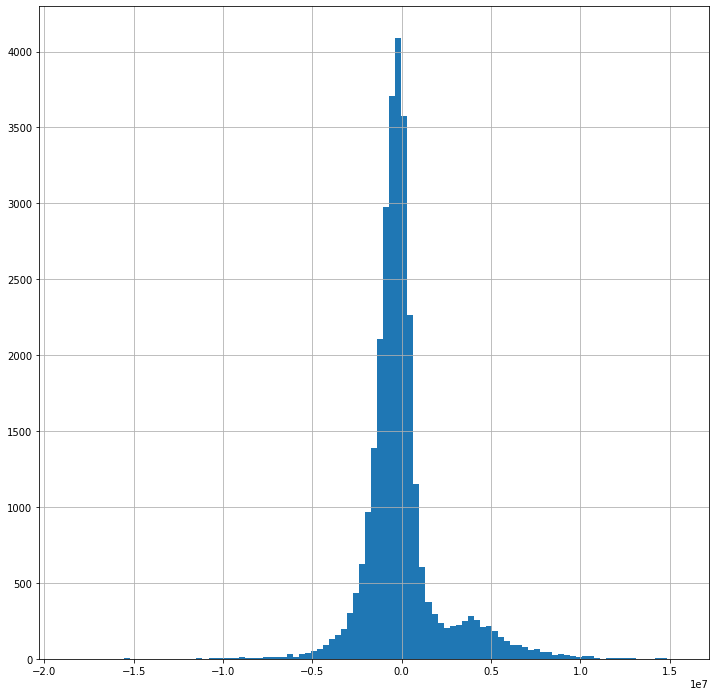

In [176]:
# whole_train_df_to_data_prep2[whole_train_df_to_data_prep2.full_sq < 1000].model_errors.hist(bins=50)
whole_train_df_to_data_prep2[np.abs(whole_train_df_to_data_prep2.model_errors) < 20000000].model_errors.hist(bins=101, figsize=(12,12))

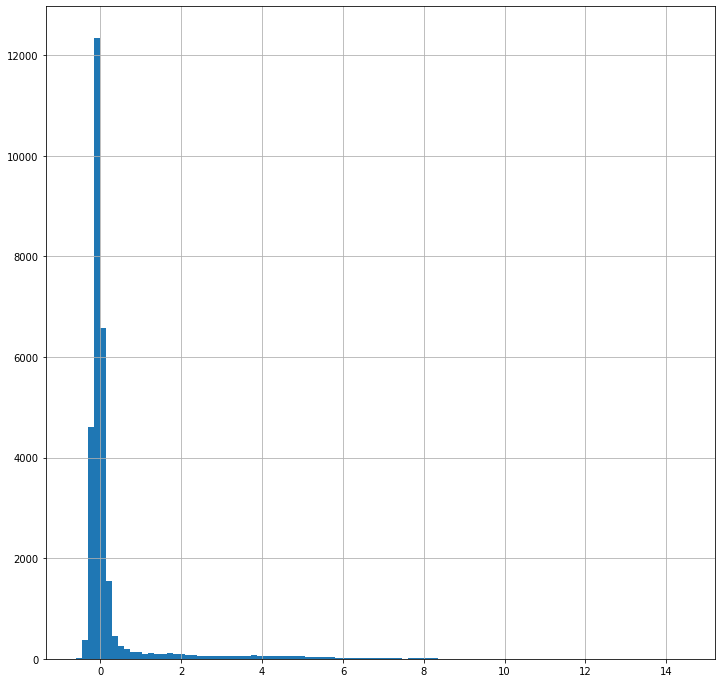

In [177]:
(whole_train_df_to_data_prep2[np.abs(whole_train_df_to_data_prep2.model_errors) < 20000000].model_errors / \
 whole_train_df_to_data_prep2[np.abs(whole_train_df_to_data_prep2.model_errors) < 20000000].price) .hist(bins=101, figsize=(12,12))

In [178]:
# бинаризуем данные по площади
# длинный хвост пойдет в последний бин
bins = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 20, 30, 50, 1000]) * 10**6
whole_train_df_to_data_prep2['price_bins'] = np.searchsorted(bins, whole_train_df_to_data_prep2.price.values)

In [179]:
bins

array([         0,    2000000,    4000000,    6000000,    8000000,
         10000000,   12000000,   14000000,   16000000,   20000000,
         30000000,   50000000, 1000000000])

In [180]:
whole_train_df_to_data_prep2['price_bins']

0        5
1        4
2        3
3        3
4        3
        ..
28995    3
28996    3
28997    4
28998    4
28999    2
Name: price_bins, Length: 29000, dtype: int64

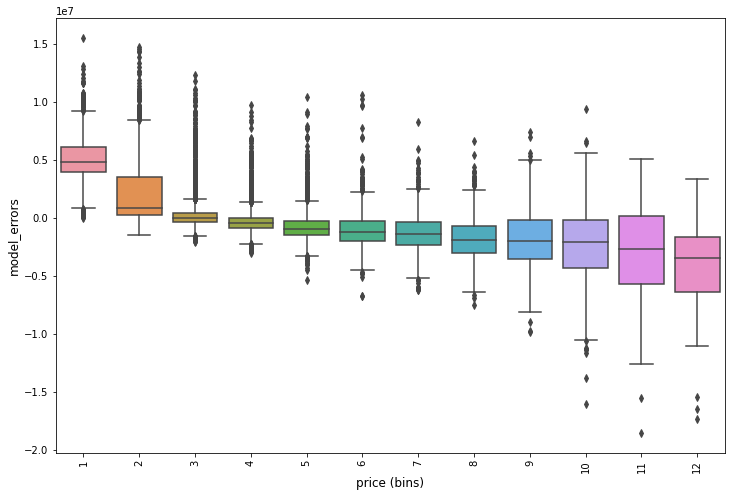

In [181]:
# посмотрим на зависимость цены от количества окружающих культурных объектов
# возможно, стоит посмотреть на записи с culture_objects_facilities == 10

plt.figure(figsize=(12, 8))
sns.boxplot(x='price_bins', y='model_errors', data=whole_train_df_to_data_prep2)
plt.ylabel('model_errors', fontsize=12)
plt.xlabel('price (bins)', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [202]:
whole_train_df_to_data_prep2

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count,church_facilities,mosque,leisure_facilities,full_sq_bins,year,month,week_of_year,day_of_week,timestamp_int
0,30392,2014-12-30,60.0,36.00,6.0,9.0,1,1974.00,3.0,5.0,...,0.0,0.0,0.0,0.0,4,2014,12,1,1,2014-12-30
1,36540,2013-06-28,44.0,29.00,9.0,5.0,other,5.00,5.0,5.0,...,1.0,0.0,0.0,0.0,3,2013,6,26,4,2013-06-28
2,94669,2013-09-15,62.0,60.00,4.0,4.0,other,4.00,4.0,4.0,...,4.0,0.0,0.0,0.0,5,2013,9,37,6,2013-09-15
3,17531,2013-12-13,33.0,18.00,4.0,9.0,1,1970.00,1.0,6.0,...,1.0,0.0,0.0,0.0,2,2013,12,50,4,2013-12-13
4,32159,2014-02-13,37.0,14.00,1.0,17.0,1,1991.00,1.0,1.0,...,3.0,0.0,0.0,0.0,2,2014,2,7,3,2014-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58.0,0.00,2.0,0.0,other,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,4,2013,5,19,2,2013-05-08
28996,11345,2014-04-12,38.0,11.12,9.0,17.0,1,11.12,1.0,1.0,...,71.0,15.0,0.0,0.0,2,2014,4,15,5,2014-04-12
28997,55519,2013-09-23,55.0,30.00,9.0,16.0,1,2002.00,2.0,8.0,...,0.0,0.0,0.0,0.0,4,2013,9,39,0,2013-09-23
28998,17196,2013-11-19,37.0,19.00,3.0,16.0,5,1979.00,1.0,9.0,...,3.0,0.0,0.0,0.0,2,2013,11,47,1,2013-11-19


In [326]:
# naive_forecast = np.ones(shape=len(train_main_df.price)) * np.median(train_main_df.price)
naive_forecast = np.ones_like(train_main_df.price) * np.median(train_main_df.price)

metrics.mean_squared_error(train_main_df.price, naive_forecast) ** 0.5

5139417.780060272

In [114]:
from sklearn.linear_model import LinearRegression

In [127]:
col_list_lr = [
    'full_sq', 'life_sq', 'floor', 'max_floor',
#   'material', 'apartment condition',
    'build_year', 'num_room', 'kitch_sq', 
       'sub_area', 'full_sq_bins', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'week_of_year', 'day_of_week',
       'ratio_life_dash_full_sq', 'ratio_kitchen_dash_full_sq',
       'age', 'some_extra_sqr',
        
        'ratio_life_sq_dash_n_rooms', 'ratio_nonlife_sq_dash_full_sq', 'is_last_floor', 'is_first_floor' #,
            
#        'apartment_condition_2.0', 'apartment_condition_3.0',
#        'apartment_condition_4.0', 'apartment_condition_33.0',
#        'apartment_condition_other', 'material_2.0', 'material_3.0',
#        'material_4.0', 'material_5.0', 'material_6.0', 'material_other'
        ]



names = ['floor', 'max_floor',
#   'material', 'apartment condition',
    'build_year', 'num_room', 'kitch_sq', 
       'sub_area', 'full_sq_bins', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'week_of_year', 'day_of_week',
       'ratio_life_dash_full_sq', 'ratio_kitchen_dash_full_sq',
       'age', 'some_extra_sqr',
        
        'ratio_life_sq_dash_n_rooms', 'ratio_nonlife_sq_dash_full_sq', 'is_last_floor', 'is_first_floor']

In [162]:
for item in names:
    print(item)
    model_lr.fit(X = train_X[['full_sq', 'life_sq', item]], y = train_y)

floor
max_floor
build_year
num_room
kitch_sq
sub_area
full_sq_bins
population
indust_part
preschool_facilities
school_facilities
hospital_beds_raion
healthcare_facilities
university_num
sport_objects_facilities
additional_education_facilities
culture_objects_facilities
shopping_centers_facilities
office_num
green_part
prom_part
cafe_count
church_facilities
mosque
leisure_facilities
year
month
week_of_year
day_of_week
ratio_life_dash_full_sq
ratio_kitchen_dash_full_sq
age
some_extra_sqr
ratio_life_sq_dash_n_rooms
ratio_nonlife_sq_dash_full_sq
is_last_floor
is_first_floor


In [165]:
model_lr = LinearRegression()
model_lr.fit(X = train_X[col_list], y = train_y)
# model_lr.fit(X = train_X['full_sq'], y = train_y)


LinearRegression()

In [168]:
# calc rmse
y_pred = model_lr.predict(val_X[col_list])
y_test = np.array(val_y)

y_test_e = np.exp(y_test)
y_pred_e = np.exp(y_pred)

rmse = metrics.mean_squared_error(y_test_e, y_pred_e) ** 0.5
rmse

3687898.527649849

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
## rf
model_rf = RandomForestRegressor(
    n_estimators=1000,
    min_samples_leaf=100
    )

In [176]:
model_rf.fit(X = train_X[col_list], y = train_y)

RandomForestRegressor(min_samples_leaf=100, n_estimators=1000)

In [177]:
# calc rmse
y_pred = model_rf.predict(val_X[col_list])
y_test = np.array(val_y)

y_test_e = np.exp(y_test)
y_pred_e = np.exp(y_pred)

rmse = metrics.mean_squared_error(y_test_e, y_pred_e) ** 0.5
rmse

3570678.5928083304

## CV with model.train()

In [673]:
# n_folds = 5
# params = {
#     'eta': 0.02,
#     'max_depth': 5,
#     'subsample': 0.7,
#     'colsample_bytree': 0.7,
#     'objective': 'binary:logistic',
#     'seed': 99,
#     'silent': 1,
#     'eval_metric':'auc',
#     'nthread':4}

xgb_params = {
    'eta': 0.025,
    'max_depth': 4,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
#     'objective': 'reg:linear',
#     'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
#     'min_child_weight': 100,
    'min_child_weight': 20,
    'booster': 'gbtree',
#     'silent': 1,
    'seed':0
}

# xg_train = xgb.DMatrix(x_train, label=y_train);

# cv = xgb.cv(params, xg_train, 5000, nfold=n_folds, early_stopping_rounds=early_stopping, verbose_eval=1)


In [674]:
col_list = set(var_real).union(set(var_cat)) - set(var_target) - set(var_tech) - set(var_excl)

# col_list = ['full_sq', 'life_sq', 'floor', 'max_floor',
# #        'material', 'apartment condition',
#        'build_year', 'num_room', 'kitch_sq', 
#        'sub_area', 'full_sq_bins', 'population', 'indust_part',
#        'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
#        'healthcare_facilities', 'university_num', 'sport_objects_facilities',
#        'additional_education_facilities', 'culture_objects_facilities',
#        'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
#        'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
#        'year', 'month', 'week_of_year', 'day_of_week',
#        'ratio_life_dash_full_sq', 'ratio_kitchen_dash_full_sq',
#        'age', 'some_extra_sqr',
        
#        'ratio_life_sq_dash_n_rooms', 'ratio_nonlife_sq_dash_full_sq', 'is_last_floor', 'is_first_floor',
            
#        'apartment_condition_2.0', 'apartment_condition_3.0',
#        'apartment_condition_4.0', 'apartment_condition_33.0',
#        'apartment_condition_other', 'material_2.0', 'material_3.0',
#        'material_4.0', 'material_5.0', 'material_6.0', 'material_other'
#         ]


In [675]:
# создадим данные для обучения и валидации

# xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)
# xgb_test = xgb.DMatrix(val_X[col_list], val_y, feature_names = col_list, enable_categorical=True)
# dir(xgb_train)

train_X = whole_train_df.drop(['price','timestamp'], axis=1)
train_y = whole_train_df.price

xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)
n_folds = 5

In [676]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]
eval_set = [(train_X, train_y), (val_X, val_y)]
evals_result = {}
# eval_set = [(X_train, Y_train), ()]

# # we can stop model using only test df
# eval_set = [(X_test, y_test)]
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [346]:
%%time
model = xgb.train(params = xgb_params,
                  dtrain = xgb_train, 
#                   num_boost_round = 3000,
                  num_boost_round = 600,
                  evals = evallist, 
                  early_stopping_rounds = 25, 
                  verbose_eval = 50                  
                 )

[0]	eval-rmse:14.78400	train-rmse:14.78944
[50]	eval-rmse:4.19651	train-rmse:4.19994
[100]	eval-rmse:1.26918	train-rmse:1.27130
[150]	eval-rmse:0.57509	train-rmse:0.57583
[200]	eval-rmse:0.47412	train-rmse:0.47381
[250]	eval-rmse:0.46206	train-rmse:0.46118
[300]	eval-rmse:0.45854	train-rmse:0.45748
[350]	eval-rmse:0.45615	train-rmse:0.45499
[400]	eval-rmse:0.45407	train-rmse:0.45282
[450]	eval-rmse:0.45216	train-rmse:0.45100
[500]	eval-rmse:0.45050	train-rmse:0.44926
[550]	eval-rmse:0.44887	train-rmse:0.44766


KeyboardInterrupt: 

In [677]:
%%time
# cv = xgb.cv(params, xg_train, 5000, nfold=n_folds, early_stopping_rounds=early_stopping, verbose_eval=1)
model_cv = xgb.cv(params = xgb_params,
                  dtrain = xgb_train,
                  nfold = n_folds,
#                   num_boost_round = 3000,
                  num_boost_round = 1000,
                  early_stopping_rounds = 25, 
                  verbose_eval = 25                  
                 )

CPU times: user 7min 20s, sys: 1.93 s, total: 7min 22s
Wall time: 58.3 s


In [678]:
model_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.789534,0.001772,14.789534,0.007012
1,14.420390,0.001739,14.420397,0.006989
2,14.060490,0.001700,14.060548,0.006980
3,13.709610,0.001658,13.709682,0.006951
4,13.367552,0.001628,13.367632,0.006960
...,...,...,...,...
755,0.436500,0.001907,0.464476,0.008206
756,0.436465,0.001904,0.464477,0.008199
757,0.436433,0.001902,0.464468,0.008202
758,0.436398,0.001900,0.464460,0.008205


In [ ]:
# prev results
# 777	0.436084	0.001817	0.464114 (test)

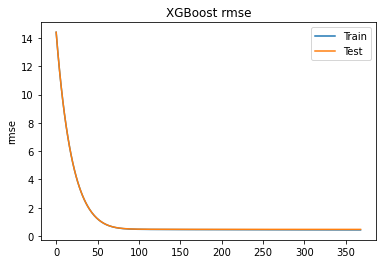

In [76]:
# make predictions for test data
y_pred_train = model_cv['train-rmse-mean']
y_pred_test = model_cv['test-rmse-mean']

epochs = len(y_pred_test)
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, y_pred_train, label='Train')
ax.plot(x_axis, y_pred_test, label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost rmse')
pyplot.show()

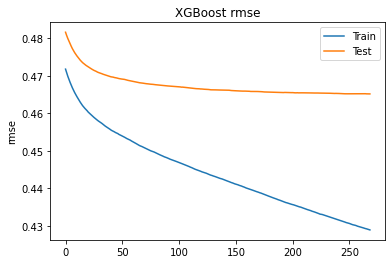

In [79]:
# make predictions for test data
y_pred_train = model_cv['train-rmse-mean'][100:]
y_pred_test = model_cv['test-rmse-mean'][100:]

epochs = len(y_pred_test)
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, y_pred_train, label='Train')
ax.plot(x_axis, y_pred_test, label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost rmse')
pyplot.show()

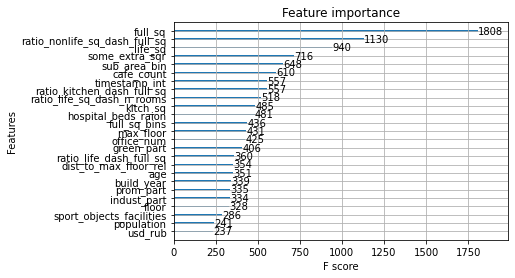

<Figure size 1152x864 with 0 Axes>

CPU times: user 616 ms, sys: 36.1 ms, total: 652 ms
Wall time: 629 ms


In [85]:
%%time
xgb.plot_importance(model, height=0.2, max_num_features=25, importance_type='weight')
plt.figure(figsize = (16, 12))
plt.show()

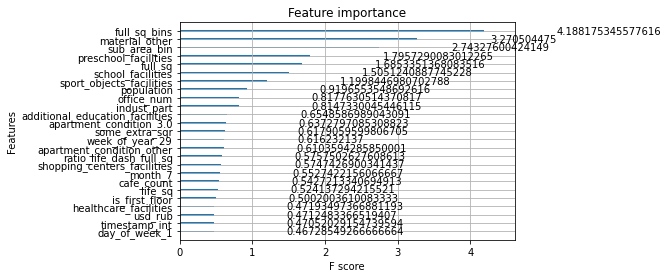

<Figure size 1152x864 with 0 Axes>

CPU times: user 806 ms, sys: 40 ms, total: 846 ms
Wall time: 842 ms


In [86]:
%%time
xgb.plot_importance(model, height=0.2, max_num_features=25, importance_type='gain')
plt.figure(figsize = (16, 12))
plt.show()

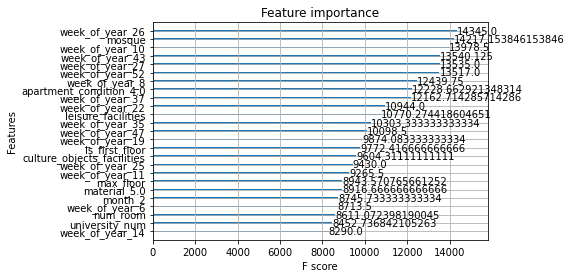

<Figure size 1152x864 with 0 Axes>

CPU times: user 667 ms, sys: 4.04 ms, total: 671 ms
Wall time: 665 ms


In [87]:
%%time
xgb.plot_importance(model, height=0.2, max_num_features=25, importance_type='cover')
plt.figure(figsize = (16, 12))
plt.show()

## xgb.train() with CV & grid search

In [321]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import metrics

In [269]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [355]:
# names for .train() instead .fit()
xgb_gs_params_draft = {
    'eta': list(np.linspace(0.02, 0.2, 10)),
    'max_depth': list(range(3, 8)),
    'subsample': list(np.linspace(0.5, 0.8, 3)),
    'colsample_bytree': list(np.linspace(0.5, 0.8, 3)),
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'min_child_weight': list(range(5, 355, 50)),
#     'silent': 1,
    'seed':0
}

# names for .train() instead .fit()
xgb_gs_params_tst_draft = {
    'eta': [0.05, 0.1],
    'max_depth': [4,6],
    'subsample': 0.618,
    'colsample_bytree': 0.618,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'min_child_weight': 50,
#     'silent': 1,
    'seed':0
}

xgb_gs_params_to_grid_tst = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [4,6]
}

xgb_gs_params_tst = {
    'subsample': 0.618,
    'colsample_bytree': 0.618,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'min_child_weight': 50,
#     'silent': 1,
    'seed':0
}


# xgb_params = {
#     'eta': 0.05,
#     'max_depth': 5,
#     'subsample': 0.618,
#     'colsample_bytree': 0.618,
#     'objective': 'reg:squarederror',
#     'eval_metric': 'rmse',
#     'min_child_weight': 50,
# #     'silent': 1,
#     'seed':0
# }

# # EXAMPLE A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [356]:
train_X = whole_train_df.drop(['price','timestamp', 'year_month'], axis=1)
train_y = whole_train_df.price

xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)

In [342]:
# %%time
# model = xgb.train(params = xgb_params,
#                     dtrain = xgb_train, 
#                     num_boost_round = 500,
#                     evals = evallist, 
#                     early_stopping_rounds = 25, 
#         #             verbose_eval = 50
#                     verbose_eval = 300
#                  )

In [ ]:
# EXAMPLE (kaggle tilii7)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
# EXAMPLE 2
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}
# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)
# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)
# Fit randomized_mse to the data
randomized_mse.fit(X, y)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

In [363]:
xgb_obj = xgb.XGBModel(
    n_estimators=500,
#     n_estimators=100,
    **xgb_gs_params_tst
    )
folds = 3
param_comb = 2

In [364]:
random_search = RandomizedSearchCV(
    xgb_obj,
    param_distributions=xgb_gs_params_to_grid_tst,
    n_iter=param_comb,
    scoring='neg_mean_squared_error',
    cv=folds,
    verbose=3,
    return_train_score=True,
    random_state=1001 
    )


In [365]:
%%time
# random_search.fit(xgb_train)
random_search.fit(train_X, train_y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=4, learning_rate=0.05 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, learning_rate=0.05, score=(train=-6558393834288.357, test=-8801874595092.756), total=  14.7s
[CV] max_depth=4, learning_rate=0.05 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.8s remaining:    0.0s


[CV]  max_depth=4, learning_rate=0.05, score=(train=-6256261622631.085, test=-9045114032648.379), total=  16.0s
[CV] max_depth=4, learning_rate=0.05 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.9s remaining:    0.0s


[CV]  max_depth=4, learning_rate=0.05, score=(train=-6926714882539.768, test=-7688728504120.188), total=  17.0s
[CV] max_depth=4, learning_rate=0.1 ..................................
[CV]  max_depth=4, learning_rate=0.1, score=(train=-5780651443968.242, test=-8702733321428.979), total=  17.0s
[CV] max_depth=4, learning_rate=0.1 ..................................
[CV]  max_depth=4, learning_rate=0.1, score=(train=-5386112921088.465, test=-9057696917878.025), total=  19.8s
[CV] max_depth=4, learning_rate=0.1 ..................................
[CV]  max_depth=4, learning_rate=0.1, score=(train=-6028152656216.393, test=-7575426891046.113), total=  21.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min finished


Wall time: 2min 15s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBModel(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=0.618,
                                      eval_metric='rmse', gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=50,
                                      missing=na...
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=None, scale_pos_weight=None,
                                      seed=0, subsample=0.618, tree_method=None,
                                     

In [369]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized RMSE score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print((random_search.best_score_ * -1) ** 0.5)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([15.8166666, 19.3260142]), 'std_fit_time': array([0.96117415, 1.90674902]), 'mean_score_time': array([0.08200192, 0.10379815]), 'std_score_time': array([0.00293903, 0.01076094]), 'param_max_depth': masked_array(data=[4, 4],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.05, 0.1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 4, 'learning_rate': 0.05}, {'max_depth': 4, 'learning_rate': 0.1}], 'split0_test_score': array([-8.80187460e+12, -8.70273332e+12]), 'split1_test_score': array([-9.04511403e+12, -9.05769692e+12]), 'split2_test_score': array([-7.68872850e+12, -7.57542689e+12]), 'mean_test_score': array([-8.51193410e+12, -8.44531571e+12]), 'std_test_score': array([5.90474315e+11, 6.31913538e+11]), 'rank_test_score': array([2, 1]), 'split0_train_score': array([-6.55839383e+12, -5.78065144e+12]), 'split1_tr

## with model.fit() (probably without DMatrices works much slower than '.train')

In [679]:
train_X
train_y
# val_X
# val_y

0        16.088852
1        15.709104
2        15.555679
3        15.435889
4        15.506529
           ...    
28995    15.281148
28996    15.379930
28997    15.797891
28998    15.610266
28999    14.686386
Name: price, Length: 29000, dtype: float64

In [680]:
# xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)
# xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)

In [687]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]
train_X, train_y, val_X, val_y
eval_set = [(train_X, train_y), (val_X, val_y)]
evals_result = {}

In [688]:
# reg linear models
xgb_params = {
#     'eta': 0.05,
    'learning_rate': 0.05, 
    'max_depth': 5,
    'subsample': 0.618,
    'colsample_bytree': 0.618,
    'objective': 'reg:linear',
#     'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'min_child_weight': 2,
    'silent': 1,
    'seed':0
}

In [689]:
%%time

model = xgb.XGBModel(
#     params = xgb_params,
    **xgb_params,
#     num_boost_round = 100, # 500,
#     num_boost_round = 500,\
    num_parallel_tree = 3,
    n_estimators = 500,
    evals_result = evals_result,
    early_stopping_rounds = 10
    )

model.fit(
    train_X, 
    train_y,
    eval_set = eval_set,
    verbose = 25
    )

# model = xgb.train(params = xgb_params,
#                   dtrain = xgb_train, 
#                   num_boost_round = 100 , # 500
#                   evals = evallist, 
#                   evals_result = evals_result,
#                   early_stopping_rounds = 10, 
#                   verbose_eval = 25                  
#                  )

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.material, apartment condition

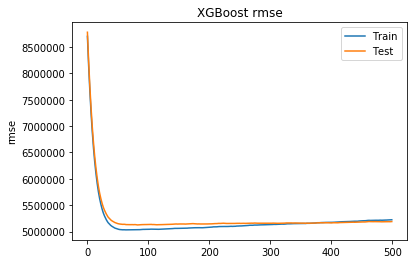

In [170]:
# make predictions for test data
y_pred = model.predict(val_X)
# predictions = [round(value) for value in y_pred]
# evaluate predictions
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost rmse')
pyplot.show()

In [ ]:
# # make predictions for test data
# y_pred = model.predict(xgb_test)
# predictions = [round(value) for value in y_pred]
# evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
# results = model.evals_result()
# epochs = len(results['validation_0']['error'])
# x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Post analysis 

In [179]:
from xgboost import plot_importance

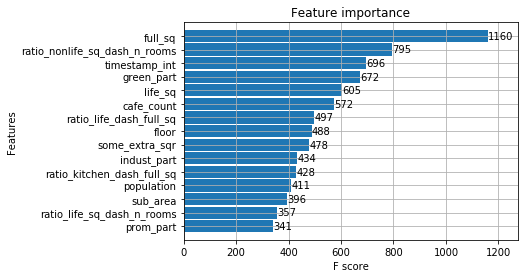

In [181]:
# посмотрим на важность фичей
# full_sq - самая важная, при этом падение в важности заметное
# можно подумать над исправлением данного момента
plot_importance(model,max_num_features=15, height=0.9)
# plot_importance(model_2,max_num_features=15, height=0.9)

In [182]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(val_y)

In [183]:
scores['predicted'] = model.predict(xgb_test)

In [184]:
scores['error'] = scores.price - scores.predicted

In [185]:
scores

,price,predicted,error
27,4202900.0,4226090.0,-23190.0
61,19040000.0,17373114.0,1666886.0
86,5811300.0,7530569.5,-1719269.5
121,4437100.0,4514624.5,-77524.5
141,12599400.0,9836425.0,2762975.0
...,...,...,...
28911,11271500.0,11467314.0,-195814.0
28914,6966300.0,7878683.0,-912383.0
28920,11528400.0,10913435.0,614965.0
28931,8526400.0,7549300.0,977100.0


In [186]:
scores['error'].describe()

count    1.309000e+03
mean    -1.488149e+05
std      2.720186e+06
min     -2.101304e+07
25%     -8.171760e+05
50%      2.517700e+04
75%      9.166920e+05
max      1.568901e+07
Name: error, dtype: float64

In [ ]:
# зная примеры, на которых большие ошибки, можно пробовать тюнить модель

# predict test data (while wrong – incorrect median values)

In [88]:
test_main_df = pd.read_csv('HW_test_main_data.csv')
test_additional_df = pd.read_csv('HW_test_additional_data.csv')

In [89]:
# добавим дополнительные данные

whole_test_df = test_main_df.merge(test_additional_df, how='left', on='id')
whole_test_df_to_data_prep = whole_test_df

In [90]:
whole_test_df['timestamp_int'] = pd.to_datetime(whole_test_df.timestamp)

In [91]:
# теперь - сводные статистики по числовым переменным

whole_test_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
count,1000.000000,1000.000000,797.000000,995.000000,688.000000,688.000000,559.000000,688.000000,688.000000,565.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,544.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,54982.245000,54.196000,43.037641,7.901508,12.521802,2.026163,1917.082290,1.938953,6.014535,2.100885,76.115000,85545.639000,0.115138,4.137000,4.807000,1196.753676,1.333000,0.137000,6.739000,2.972000,0.264000,4.125000,7.799000,13.741470,5.90119,3.442000,0.48500,0.002000,0.084000
std,25884.093699,18.820728,264.380486,5.420390,6.331878,1.635456,360.430612,0.837126,4.205399,0.837136,38.559235,59707.295673,0.117816,3.066861,3.537268,1063.715855,1.486041,0.443201,6.484978,3.344907,1.387166,4.642944,22.011204,17.048782,12.12949,9.689506,1.85127,0.044699,0.439474
min,10114.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2546.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,32023.500000,39.000000,20.000000,3.000000,9.000000,1.000000,1967.000000,1.000000,1.000000,1.000000,43.000000,21819.000000,0.017647,2.000000,2.000000,350.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.750000,0.000000,1.480000,0.00000,0.000000,0.00000,0.000000,0.000000
50%,55393.500000,50.500000,30.000000,7.000000,12.000000,1.000000,1979.000000,2.000000,6.000000,2.000000,75.000000,83844.000000,0.072158,4.000000,5.000000,1015.000000,1.000000,0.000000,6.000000,2.000000,0.000000,3.000000,2.000000,8.245000,0.00000,1.000000,0.00000,0.000000,0.000000
75%,77627.000000,65.000000,43.000000,11.000000,17.000000,2.000000,2004.500000,3.000000,9.000000,3.000000,105.000000,123000.000000,0.188784,6.000000,7.000000,1894.000000,2.000000,0.000000,10.000000,4.000000,0.000000,5.000000,5.000000,19.785000,5.76000,3.000000,0.00000,0.000000,0.000000
max,99787.000000,151.000000,7478.000000,26.000000,36.000000,6.000000,2017.000000,6.000000,41.000000,4.000000,145.000000,247469.000000,0.521867,13.000000,14.000000,4849.000000,6.000000,3.000000,29.000000,16.000000,10.000000,23.000000,141.000000,100.000000,94.03000,72.000000,15.00000,1.000000,8.000000


In [92]:
(whole_test_df.timestamp_int).describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                    661
top       2014-02-18 00:00:00
freq                        5
first     2011-10-08 00:00:00
last      2015-07-24 00:00:00
Name: timestamp_int, dtype: object

In [93]:
var_target = ['price']
var_tech = ['id', 'timestamp']
var_real = [
    'full_sq', 'life_sq', 'floor', 'max_floor',
    'build_year', 'num_room', 'kitch_sq', 'population', 'indust_part',
    'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
    'healthcare_facilities', 'university_num', 'sport_objects_facilities',
    'additional_education_facilities', 'culture_objects_facilities',
    'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
    'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities']
var_cat = set(whole_test_df.columns) - set(var_real) - set(var_target) - set(var_tech) - set(['price_log'])

In [155]:
col_list = ['full_sq', 'life_sq', 'floor', 'max_floor',
#        'material', 'apartment condition',
       'build_year', 'num_room', 'kitch_sq', 
       'sub_area', 'full_sq_bins', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'week_of_year', 'day_of_week',
       'ratio_life_dash_full_sq', 'ratio_kitchen_dash_full_sq',
       'age', 'some_extra_sqr',
        
       'ratio_life_sq_dash_n_rooms', 'ratio_nonlife_sq_dash_full_sq', 'is_last_floor', 'is_first_floor',
            
       'apartment_condition_2.0', 'apartment_condition_3.0',
       'apartment_condition_4.0', 
            'apartment_condition_33.0',
       'apartment_condition_other', 'material_2.0',
            'material_3.0',
       'material_4.0', 'material_5.0', 'material_6.0', 'material_other'
        ]

In [156]:
model

In [157]:
whole_test_df['apartment_condition_33.0'] = 0
whole_test_df['material_3.0'] = 0

In [158]:
whole_test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,...,apartment_condition_4.0,apartment_condition_other,material_2.0,material_4.0,material_5.0,material_6.0,material_other,ratio_life_dash_full_sq,ratio_kitchen_dash_full_sq,age,some_extra_sqr,ratio_life_sq_dash_n_rooms,ratio_nonlife_sq_dash_full_sq,is_last_floor,is_first_floor,apartment_condition_33.0,material_3.0
0,30307,2014-04-20,4.317488,3.784190,2.639057,2.708050,1,7.599401,1.386294,2.397895,2,4.110874,12.419045,0.086911,2.639057,2.708050,2.577182,...,0,0,0,0,0,0,0,0.581081,0.135135,-18.000000,31.000000,14.333333,0.810811,0,0,0,0
1,87380,2015-01-17,3.401197,0.000000,1.945910,2.890372,1,0.000000,0.693147,0.693147,1,4.477337,7.842671,0.034069,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.000000,0.034483,-2015.000000,29.000000,0.000000,3.000000,0,0,0,0
2,12874,2014-07-08,4.394449,0.007097,2.197225,2.890372,1,0.007097,1.386294,0.693147,other,4.644391,8.294550,0.007097,0.000000,0.000000,0.007097,...,0,1,0,0,0,0,0,0.000089,0.012500,-2013.992878,79.992878,0.002374,1.287500,0,0,0,0
3,57688,2013-01-15,3.988984,1.386294,1.609438,1.386294,other,1.386294,1.386294,1.386294,other,4.394449,11.769179,0.007691,1.945910,1.945910,1.386294,...,0,1,0,0,0,0,1,0.056604,0.056604,-2010.000000,50.000000,1.000000,1.509434,0,0,0,0
4,43433,2012-06-15,3.610918,2.995732,2.833213,0.693147,other,0.693147,0.693147,0.693147,other,4.770685,11.718915,0.161315,1.609438,1.609438,0.693147,...,0,1,0,0,0,0,1,0.527778,0.027778,-2011.000000,17.000000,19.000000,3.250000,0,0,0,0


In [159]:
xgb_test = xgb.DMatrix(whole_test_df[col_list], feature_names = col_list, enable_categorical=True)

In [284]:
# calc rmse
y_pred = model.predict(xgb_test)
y_pred_e = np.exp(y_pred)
y_pred_e

array([8381727. , 4475761.5, 6003784.5, ..., 2514012.2, 6509425. ,
       5143793.5], dtype=float32)

In [287]:
len(y_pred_e)

5788

# write data

In [206]:
import csv

In [207]:
# whole_test_df[['predicted_price']] = y_pred_e
whole_test_df[['predicted_price']] = frcst_ttl

In [208]:
whole_test_df[['id', 'predicted_price']]

,id,predicted_price
0,30307,9943781.00
1,87380,2679248.25
2,12874,8692826.00
3,57688,6556868.00
4,43433,5851402.50
...,...,...
995,28684,3748431.75
996,65212,10987513.00
997,11218,13260167.00
998,57238,7162242.00


In [209]:
## whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_1.csv', columns = None, index = None, header = None, escapechar = " ",  quoting=csv.QUOTE_NONE)

# whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_1.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
# whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_2.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
# whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_3.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
# whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_4.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
# whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_5.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction_6.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)
whole_test_df[['id', 'predicted_price']].to_csv(path_or_buf = 'prediction.csv', columns = None, index = None, escapechar = " ",  quoting=csv.QUOTE_NONE)

In [210]:
# test_read_1 = pd.read_csv('prediction_1.csv')
test_read_1 = pd.read_csv('prediction_2.csv')
# test_read_1.iloc[3, ]
test_read_1

,id,predicted_price
0,30307,9.767603e+06
1,87380,2.645642e+06
2,12874,8.747026e+06
3,57688,6.110766e+06
4,43433,5.187792e+06
...,...,...
995,28684,3.607684e+06
996,65212,1.014408e+07
997,11218,5.427072e+06
998,57238,6.688438e+06
